# Loading data into TS Fresh

Very useful documentation: https://tsfresh.readthedocs.io/en/latest/text/quick_start.html

In [1]:
from tsfresh import extract_relevant_features

# Data science trifecta
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Something to ensure that I can access the vnomics package
import sys
sys.path.insert(1, '../')

# If we package up our package formally we won't have to make the system path. This is how to keep yourself moving.

import vnomics

plt.style.use("ggplot")

Matt Mayo created the dataset we are working with using Vnomics util package to interact with the data source.

# Testing Out the Documentation Example

For a given robot, they have readings over

In [2]:
from tsfresh.examples.robot_execution_failures import download_robot_execution_failures, \
    load_robot_execution_failures
download_robot_execution_failures()
ts, y = load_robot_execution_failures()

In [3]:
ts[ts['id'] == 1]

id  time  F_x  F_y  F_z  T_x  T_y  T_z
0    1     0   -1   -1   63   -3   -1    0
1    1     1    0    0   62   -3   -1    0
2    1     2   -1   -1   61   -3    0    0
3    1     3   -1   -1   63   -2   -1    0
4    1     4   -1   -1   63   -3   -1    0
5    1     5   -1   -1   63   -3   -1    0
6    1     6   -1   -1   63   -3    0    0
7    1     7   -1   -1   63   -3   -1    0
8    1     8   -1   -1   63   -3   -1    0
9    1     9   -1   -1   61   -3    0    0
10   1    10   -1   -1   61   -3    0    0
11   1    11   -1   -1   64   -3   -1    0
12   1    12   -1   -1   64   -3   -1    0
13   1    13   -1   -1   60   -3    0    0
14   1    14   -1    0   64   -2   -1    0

In [4]:
y.index

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
            18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
            35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
            52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
            69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
            86, 87, 88],
           dtype='int64')

In [5]:
y.index[:1000]

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
            18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
            35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
            52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
            69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
            86, 87, 88],
           dtype='int64')

In [6]:
print(ts.head())

   id  time  F_x  F_y  F_z  T_x  T_y  T_z
0   1     0   -1   -1   63   -3   -1    0
1   1     1    0    0   62   -3   -1    0
2   1     2   -1   -1   61   -3    0    0
3   1     3   -1   -1   63   -2   -1    0
4   1     4   -1   -1   63   -3   -1    0


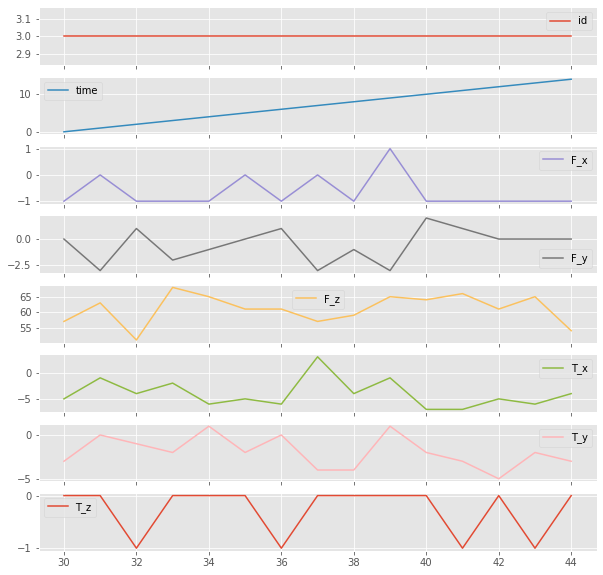

In [7]:
ts[ts['id'] == 3].plot(subplots=True, sharex=True, figsize=(10,10))
plt.show()

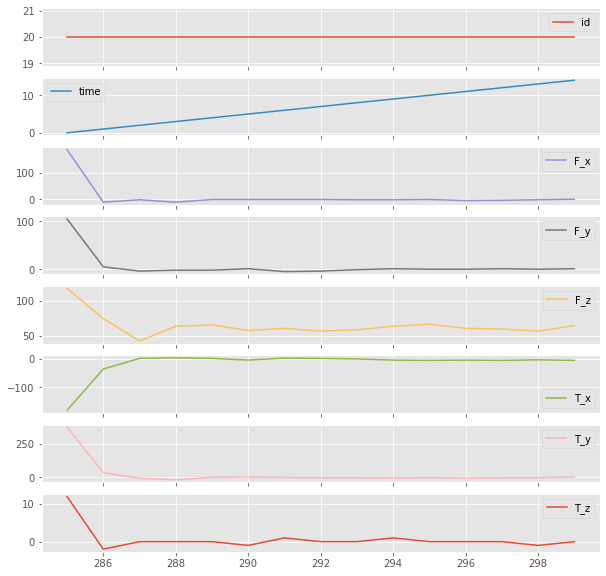

In [8]:
ts[ts['id'] == 20].plot(subplots=True, sharex=True, figsize=(10,10))
plt.show()

In [9]:
from tsfresh import extract_features
extracted_features = extract_features(ts, column_id="id", 
                                      column_sort="time")

Feature Extraction: 100%|██████████| 20/20 [00:05<00:00,  3.78it/s]


You end up with a DataFrame extracted_features with all **more than 1200 different extracted features**. We will now remove all NaN values (that were created by feature calculators, than can not be used on the given data, e.g. because it has too low statistics) and select only the relevant features next:

In [10]:
extracted_features.head()

F_x__variance_larger_than_standard_deviation  F_x__has_duplicate_max  \
1                                           0.0                     0.0   
2                                           0.0                     1.0   
3                                           0.0                     0.0   
4                                           0.0                     1.0   
5                                           0.0                     0.0   

   F_x__has_duplicate_min  F_x__has_duplicate  F_x__sum_values  \
1                     1.0                 1.0            -14.0   
2                     1.0                 1.0            -13.0   
3                     1.0                 1.0            -10.0   
4                     1.0                 1.0             -6.0   
5                     0.0                 1.0             -9.0   

   F_x__abs_energy  F_x__mean_abs_change  F_x__mean_change  \
1             14.0              0.142857          0.000000   
2             25.0              1.000000          0.000000   
3             12.0              0.714286          0.000000   
4             16.0              1.214286         -0.071429   
5             17.0              0.928571         -0.071429   

   F_x__mean_second_derivative_central  F_x__median  ...  \
1                            -0.038462         -1.0  ...   
2                            -0.038462         -1.0  ...   
3                            -0.038462         -1.0  ...   
4                            -0.038462          0.0  ...   
5                             0.038462         -1.0  ...   

   T_z__permutation_entropy__dimension_5__tau_1  \
1                                     -0.000000   
2                                      1.540306   
3                                      2.019815   
4                                      2.397895   
5                                      2.271869   

   T_z__permutation_entropy__dimension_6__tau_1  \
1                                     -0.000000   
2                                      1.748067   
3                                      2.163956   
4                                      2.302585   
5                                      2.302585   

   T_z__permutation_entropy__dimension_7__tau_1  \
1                                     -0.000000   
2                                      1.831020   
3                                      2.197225   
4                                      2.197225   
5                                      2.197225   

   T_z__query_similarity_count__query_None__threshold_0.0  \
1                                                NaN        
2                                                NaN        
3                                                NaN        
4                                                NaN        
5                                                NaN        

   T_z__matrix_profile__feature_"min"__threshold_0.98  \
1                                                NaN    
2                                                NaN    
3                                                NaN    
4                                                NaN    
5                                                NaN    

   T_z__matrix_profile__feature_"max"__threshold_0.98  \
1                                                NaN    
2                                                NaN    
3                                                NaN    
4                                                NaN    
5                                                NaN    

   T_z__matrix_profile__feature_"mean"__threshold_0.98  \
1                                                NaN     
2                                                NaN     
3                                                NaN     
4                                                NaN     
5                                                NaN     

   T_z__matrix_profile__feature_"median"__threshold_0.98  \
1                                     

In [11]:
from tsfresh import select_features
from tsfresh.utilities.dataframe_functions import impute

impute(extracted_features)
features_filtered = select_features(extracted_features, y)

/Users/mtaruno/opt/anaconda3/envs/vnomics/lib/python3.8/site-packages/tsfresh/utilities/dataframe_functions.py:171: RuntimeWarning: The columns ['F_x__partial_autocorrelation__lag_7'
 'F_x__partial_autocorrelation__lag_8'
 'F_x__partial_autocorrelation__lag_9' ...
 'T_z__matrix_profile__feature_"median"__threshold_0.98'
 'T_z__matrix_profile__feature_"25"__threshold_0.98'
 'T_z__matrix_profile__feature_"75"__threshold_0.98'] did not have any finite values. Filling with zeros.
  warnings.warn("The columns {} did not have any finite values. Filling with zeros.".format(


In [12]:
features_filtered.head()

F_x__value_count__value_-1  F_x__abs_energy  F_x__root_mean_square  \
1                        14.0             14.0               0.966092   
2                         7.0             25.0               1.290994   
3                        11.0             12.0               0.894427   
4                         5.0             16.0               1.032796   
5                         9.0             17.0               1.064581   

   F_x__range_count__max_1__min_-1  F_y__root_mean_square  F_y__abs_energy  \
1                             15.0               0.930949             13.0   
2                             13.0               2.250926             76.0   
3                             14.0               1.632993             40.0   
4                             10.0               2.000000             60.0   
5                             13.0               1.751190             46.0   

   T_y__standard_deviation  T_y__variance  \
1                 0.471405       0.222222   
2                 2.054805       4.222222   
3                 1.768867       3.128889   
4                 2.669998       7.128889   
5                 2.039608       4.160000   

   F_x__fft_coefficient__attr_"abs"__coeff_1  \
1                                   1.000000   
2                                   0.624118   
3                                   2.203858   
4                                   0.844394   
5                                   2.730599   

   T_y__fft_coefficient__attr_"abs"__coeff_1  ...  \
1                                   1.165352  ...   
2                                   6.020261  ...   
3                                   8.235442  ...   
4                                  12.067855  ...   
5                                   6.445330  ...   

   T_x__change_quantiles__f_agg_"var"__isabs_True__qh_0.2__ql_0.0  \
1                                                0.0                
2                                                0.0                
3                                                0.0                
4                                                0.0                
5                                                0.0                

   F_z__change_quantiles__f_agg_"mean"__isabs_True__qh_1.0__ql_0.8  \
1                                                0.0                 
2                                                1.0                 
3                                                3.0                 
4                                                0.0                 
5                                                0.0                 

   T_x__quantile__q_0.1  F_y__has_duplicate_max  \
1                  -3.0                     1.0   
2                  -9.2                     1.0   
3                  -6.6                     0.0   
4                  -9.0                     0.0   
5                  -9.6                     0.0   

   F_y__cwt_coefficients__coeff_13__w_2__widths_(2, 5, 10, 20)  \
1                                          -0.310265             
2                                          -0.202951             
3                                           0.539121             
4                                          -2.641390             
5                                           0.591927             

   F_y__cwt_coefficients__coeff_14__w_5__widths_(2, 5, 10, 20)  \
1                                          -0.751682             
2                                           0.057818             
3                                           0.912474             
4                                          -0.609735             
5                                           0.072771             

   T_y__quantile__q_0.1  F_z__time_reversal_asymmetry_statistic__lag_1  \
1                  -1.0                                    -596.000000   
2                  -3.6                                    -680.384615   
3                  -4.0                                  

# Applying it to Our Data

In [13]:
# Specifying beforehand the path to the data 
# folder (for reproducibility purposes)

path = '../data_2021/'

# Ingesting the data
daily = vnomics.read_daily()

In [14]:
daily.columns.tolist()

['date',
 'platform_id',
 'distance_miles',
 'fuel_used_gallons',
 'duration_mins',
 'idle_duration_mins',
 'fuel_loss_gallons',
 'dpf_regen_inhibited_duration_mins',
 'dpf_regen_not_inhibited_duration_mins',
 'dpf_regen_not_active_duration_mins',
 'dpf_regen_active_duration_mins',
 'dpf_regen_needed_duration_mins',
 'dpf_regen_inhibit_switch_not_active_duration_mins',
 'dpf_regen_inhibit_switch_active_duration_mins',
 'vehicle_serviced',
 'diagnostics_trouble_codes']

In [ ]:
['distance_miles','fuel_used_gallons','duration_mins','idle_duration_mins',
                      'fuel_loss_gallons','dpf_regen_inhibited_duration_mins','dpf_regen_not_inhibited_duration_mins',
                      'dpf_regen_not_active_duration_mins']

In [52]:
from sklearn.preprocessing import MinMaxScaler


def tsf_transform(raw_data):
    ''' Converting the raw daily data into a format that TS fresh can ingest
    
    Paramaters:
    -----------
    raw_data
    
    Returns:
    --------
    timeseries: X vector of features WITH a "time" column
    y: target column

    '''
    
    def normalize(v):
        ''' Normalize a column '''
        mx=v.max()
        mn=v.min()
        rng = mx-mn
        return v.apply(lambda x: (2*(x-mn)/rng)-1)
    
    # Trying with two platform IDs first
#     raw_data = raw_data[(raw_data['platform_id'] == 309450)|(raw_data['platform_id'] ==10321057)]
    
    # Adding a "time" column for the window with a double groupby 
    # (window function operation)
    raw_data['time'] = raw_data.groupby('platform_id')['date'].rank(method='min')
    
    # Subsetting into X and Target vectors
    y = raw_data.groupby('platform_id').sum()['vehicle_serviced']
    y = pd.Series([True if i == 1 else False for i in y], index = y.index)
    X = raw_data.drop('vehicle_serviced', axis = 1)
    
    
    # Transformations
    X['platform_id'] = X['platform_id'].astype(int)
    X['platform_id']= X['platform_id']
    X['time'] = X['time'].astype(int)
    
    # Normalizing
#     X['duration_mins']=normalize(X['duration_mins'])
#     X['dpf_regen_needed_duration_mins']=normalize(X['dpf_regen_needed_duration_mins'])
    
    
    # Subsetting
    mask = ['platform_id','time','duration_mins','dpf_regen_needed_duration_mins', 'idle_duration_mins','fuel_used_gallons']
    X = X[mask]
    X.columns = ['id','time','F1','F2'] 
    
    return X, y

In [53]:
# Taking the windowed data
fullwindow = pd.read_csv(path + 'fullwindow_data.csv')
fullwindow.drop("Unnamed: 0", inplace = True, axis = 1)
fullwindow['date'] = pd.to_datetime(fullwindow['date'])
fullwindow.tail()

date  platform_id  distance_miles  fuel_used_gallons  \
81643 2020-12-26     10321057        0.000000           0.000000   
81644 2020-12-27     10321057        0.000000           0.000000   
81645 2020-12-28     10321057       71.111881          10.254559   
81646 2020-12-29     10321057       89.829647          10.336130   
81647 2020-12-30     10321057      443.193080          64.188357   

       duration_mins  idle_duration_mins  fuel_loss_gallons  \
81643       0.000000            0.000000           0.000000   
81644       0.000000            0.000000           0.000000   
81645     256.280633           61.143883           0.895138   
81646     260.439067           63.117833           0.670019   
81647     819.277567          112.323517           3.406284   

       dpf_regen_inhibited_duration_mins  \
81643                                0.0   
81644                                0.0   
81645                                0.0   
81646                                0.0   
81647                                0.0   

       dpf_regen_not_inhibited_duration_mins  \
81643                               0.000000   
81644                               0.000000   
81645                               0.000000   
81646                               0.000000   
81647                               3.382583   

       dpf_regen_not_active_duration_mins  dpf_regen_active_duration_mins  \
81643                            0.000000                             0.0   
81644                            0.000000                             0.0   
81645                            0.000000                             0.0   
81646                            0.000000                             0.0   
81647                            3.382583                             0.0   

       dpf_regen_needed_duration_mins  \
81643                             0.0   
81644                             0.0   
81645                             0.0   
81646                             0.0   
81647                             0.0   

       dpf_regen_inhibit_switch_not_active_duration_mins  \
81643                                                0.0   
81644                                                0.0   
81645                                                0.0   
81646                                                0.0   
81647                                                0.0   

       dpf_regen_inhibit_switch_active_duration_mins  vehicle_serviced  \
81643                                            0.0                 0   
81644                                            0.0                 0   
81645                                            0.0                 0   
81646                                            0.0                 0   
81647                                            0.0                 0   

                               diagnostics_trouble_codes  
81643                                                 []  
81644                                                 []  
81645  [{'j1939': {'severity': 'unclassified', 'fmi':...  
81646  [{'j1939': {'severity': 'unclassified', 'fmi':...  
81647  [{'j1939': {'severity': 'unclassified', 'fmi':...

In [54]:
X, y = tsf_transform(fullwindow)

In [55]:
X

id  time        F1        F2
0        309450     1 -0.853560 -1.000000
1        309450     2 -0.657505 -1.000000
2        309450     3 -0.766308 -0.916801
3        309450     4 -0.913487 -0.994724
4        309450     5 -1.000000 -1.000000
...         ...   ...       ...       ...
81643  10321057   725 -1.000000 -1.000000
81644  10321057   726 -1.000000 -1.000000
81645  10321057   727 -0.830949 -1.000000
81646  10321057   728 -0.828206 -1.000000
81647  10321057   729 -0.459578 -1.000000

[81648 rows x 4 columns]

In [183]:
ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1320 entries, 0 to 1319
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      1320 non-null   int64
 1   time    1320 non-null   int64
 2   F_x     1320 non-null   int64
 3   F_y     1320 non-null   int64
 4   F_z     1320 non-null   int64
 5   T_x     1320 non-null   int64
 6   T_y     1320 non-null   int64
 7   T_z     1320 non-null   int64
dtypes: int64(8)
memory usage: 82.6 KB


In [56]:
X

id  time        F1        F2
0        309450     1 -0.853560 -1.000000
1        309450     2 -0.657505 -1.000000
2        309450     3 -0.766308 -0.916801
3        309450     4 -0.913487 -0.994724
4        309450     5 -1.000000 -1.000000
...         ...   ...       ...       ...
81643  10321057   725 -1.000000 -1.000000
81644  10321057   726 -1.000000 -1.000000
81645  10321057   727 -0.830949 -1.000000
81646  10321057   728 -0.828206 -1.000000
81647  10321057   729 -0.459578 -1.000000

[81648 rows x 4 columns]

In [57]:
y

platform_id
300498      False
300547      False
300558      False
300681      False
300771      False
            ...  
10320957    False
10320987    False
10321025    False
10321057    False
10321243     True
Length: 112, dtype: bool

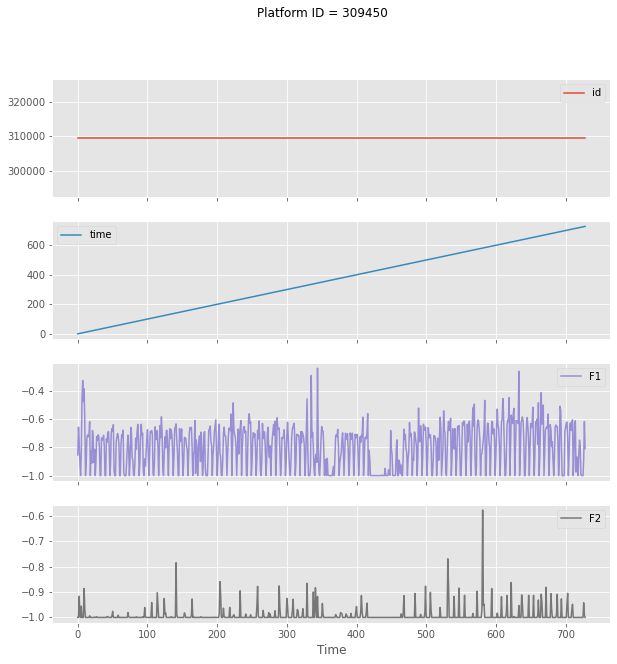

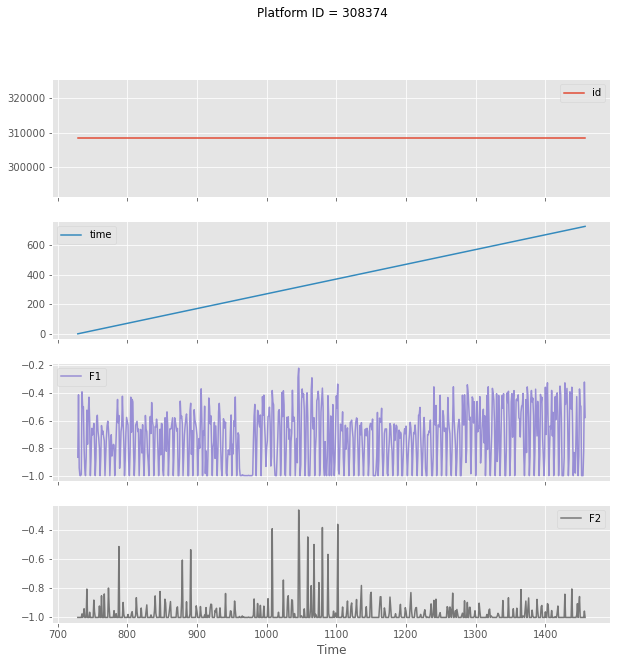

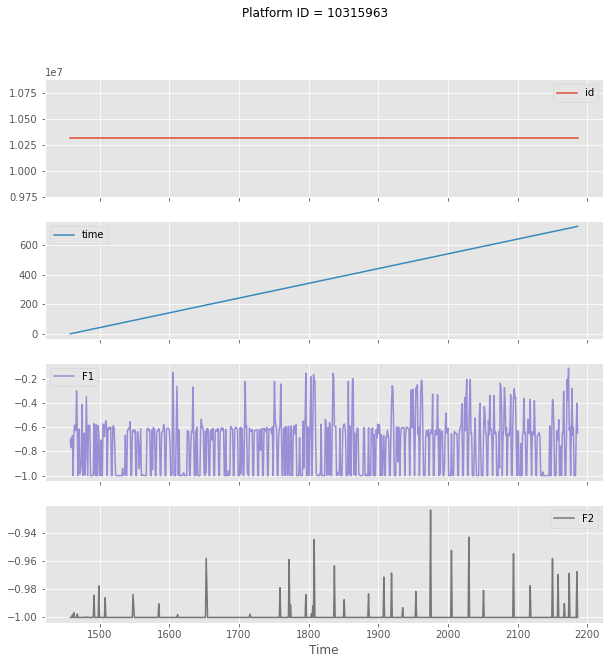

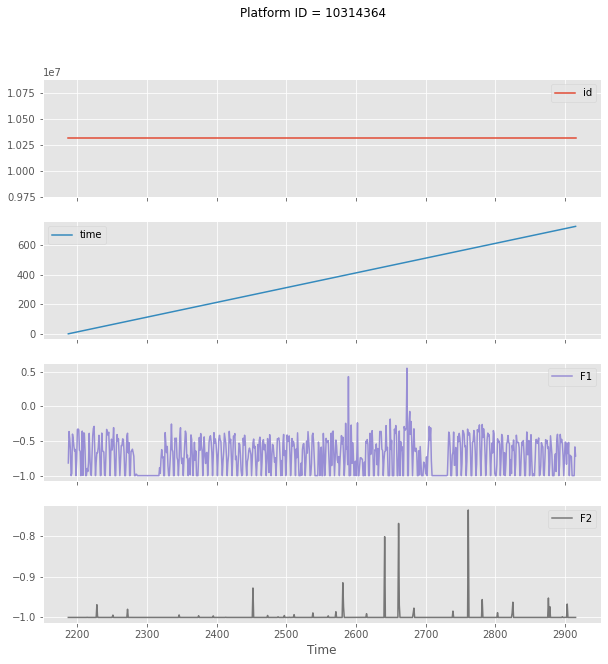

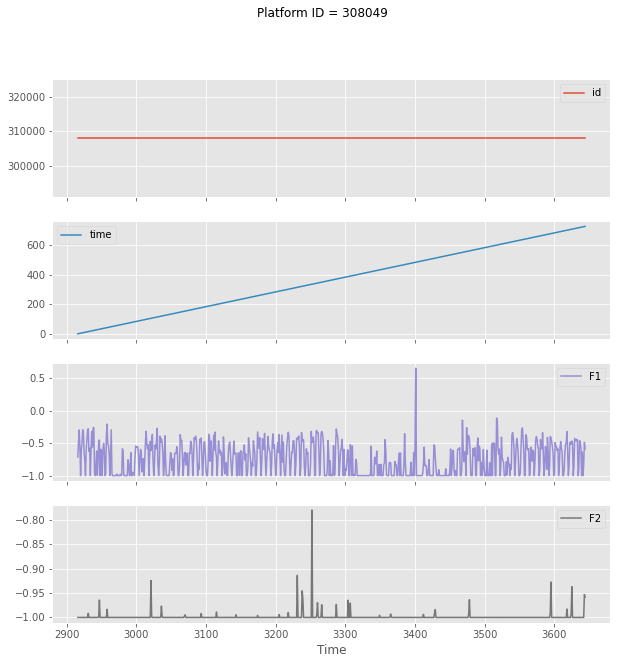

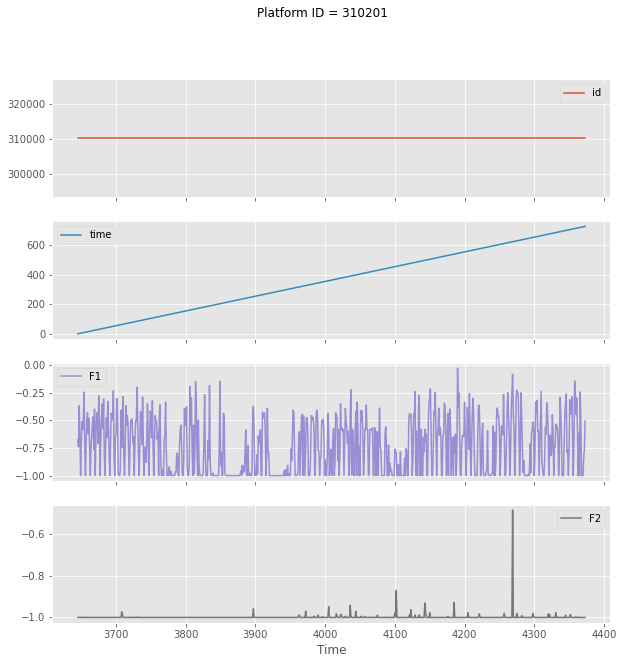

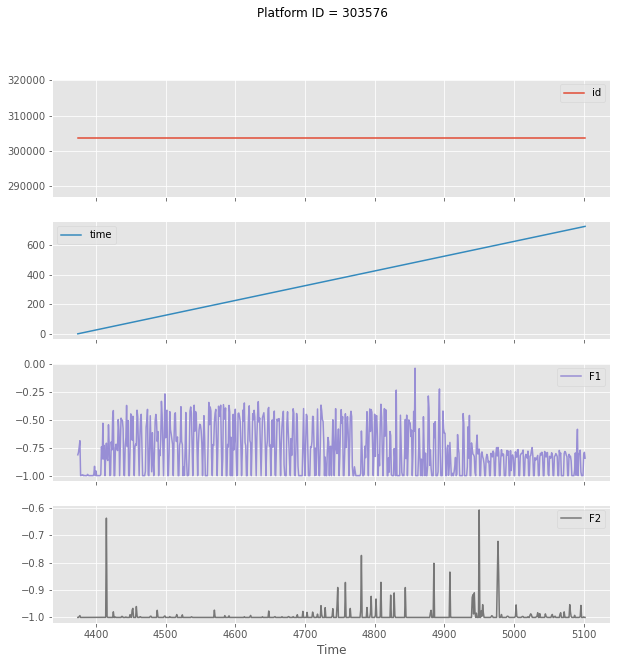

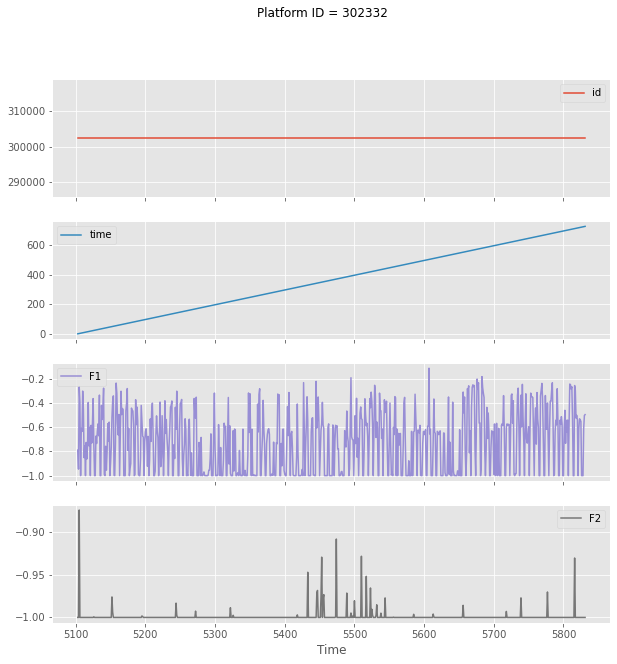

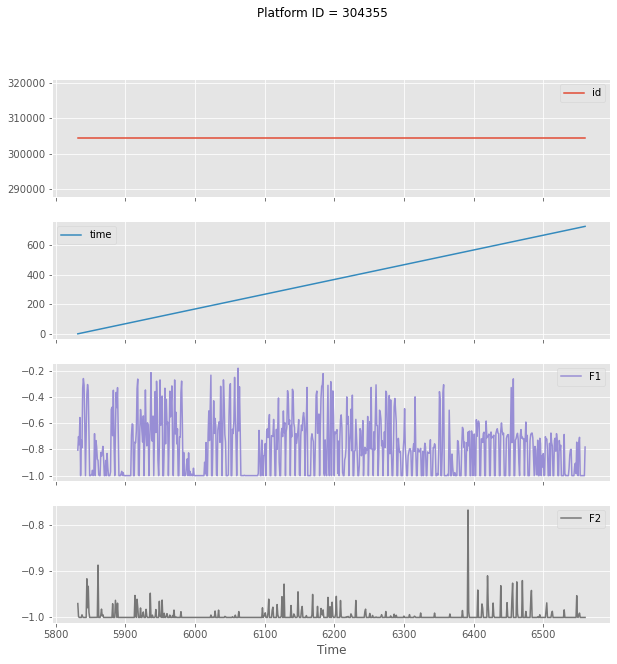

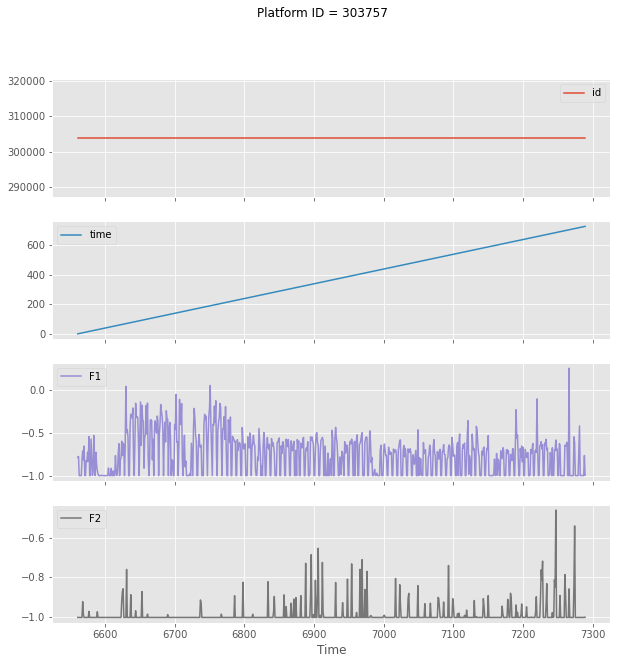

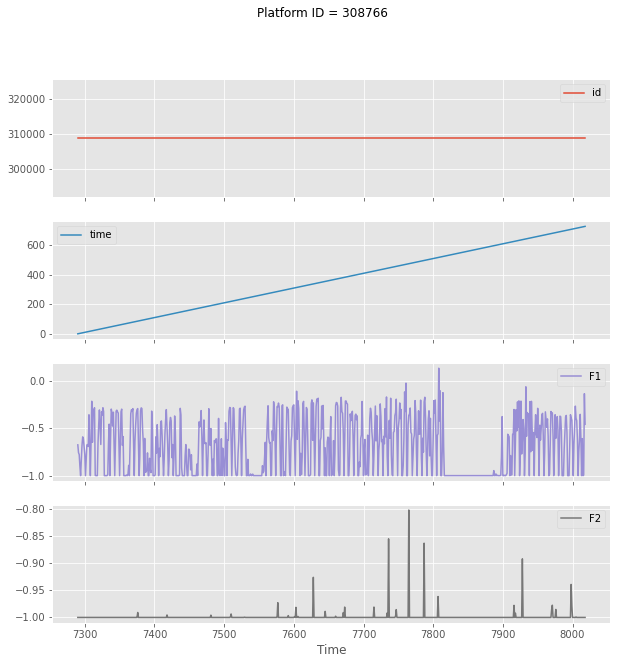

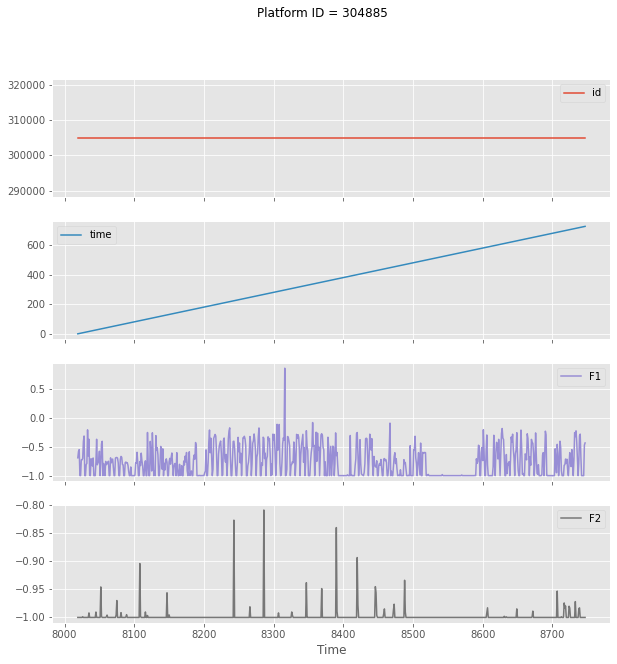

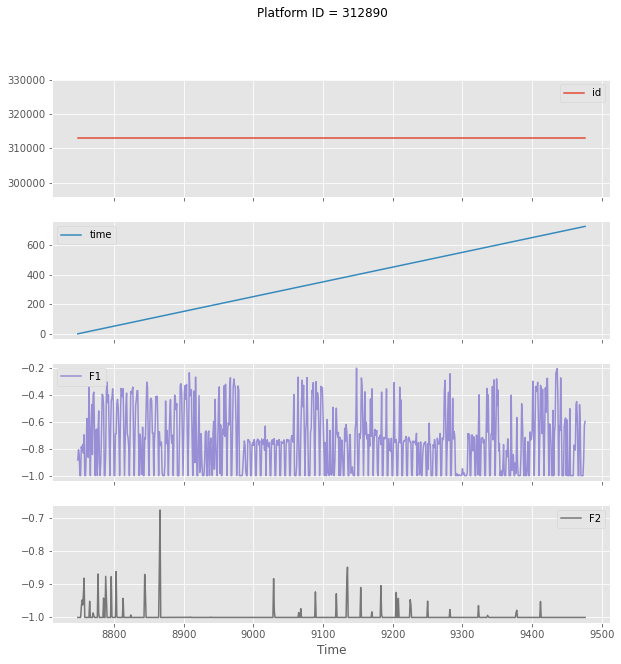

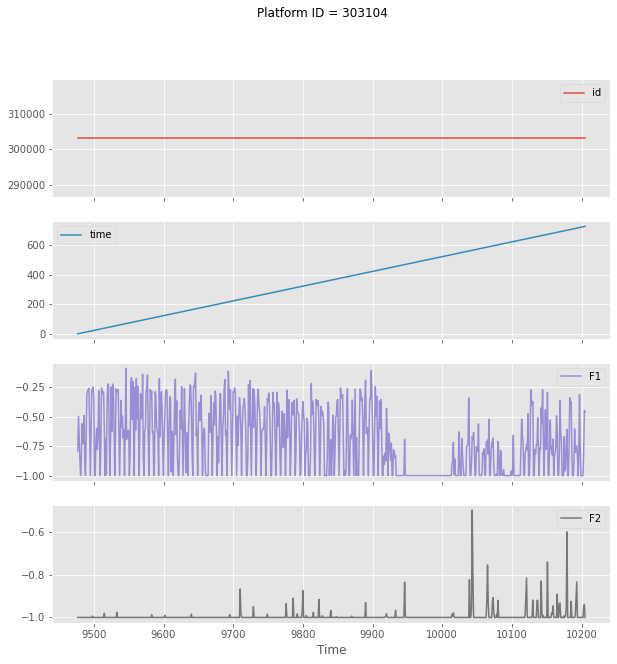

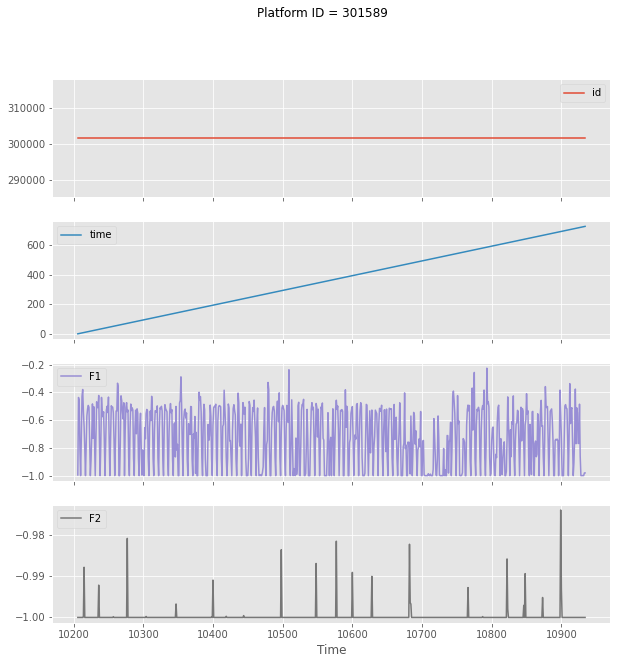

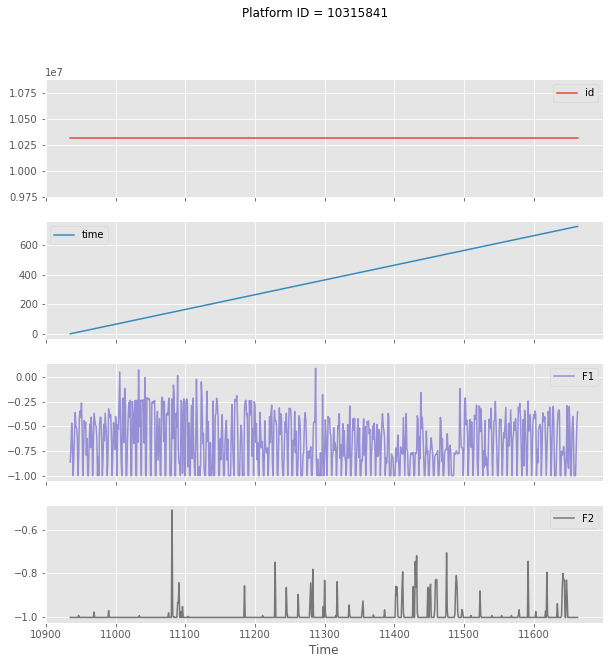

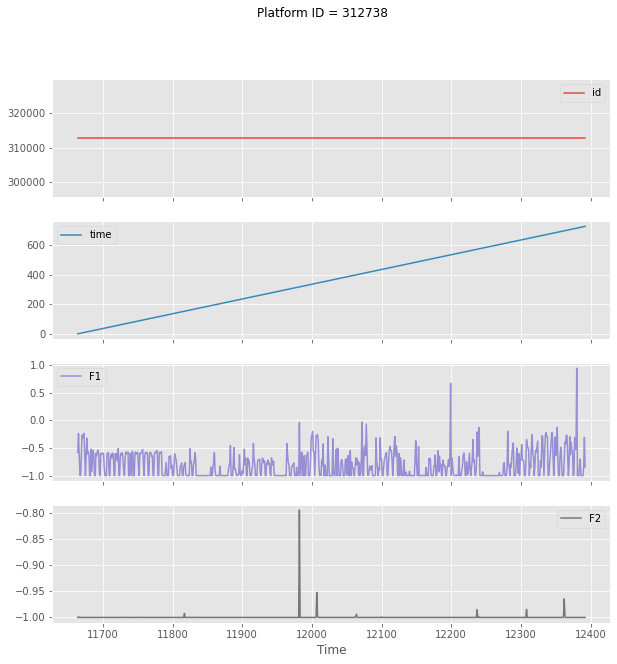

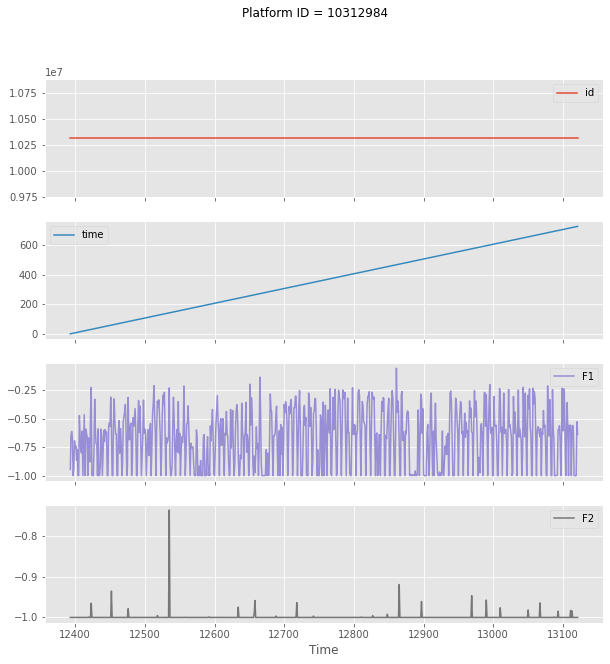

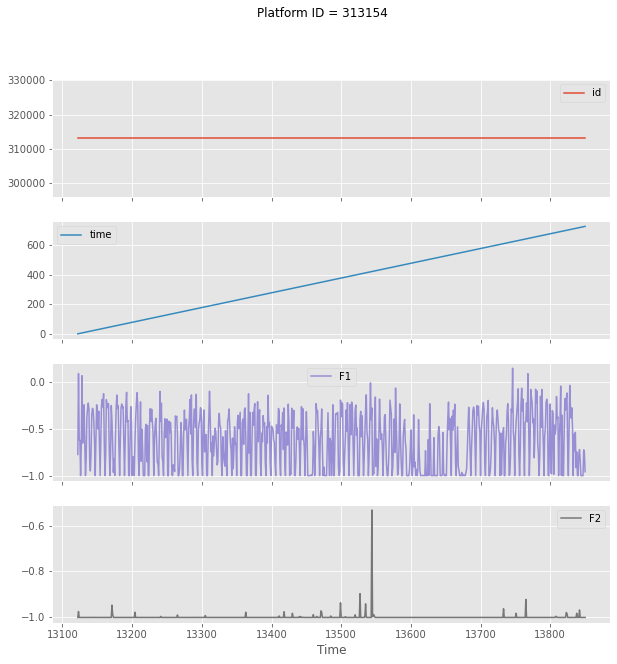

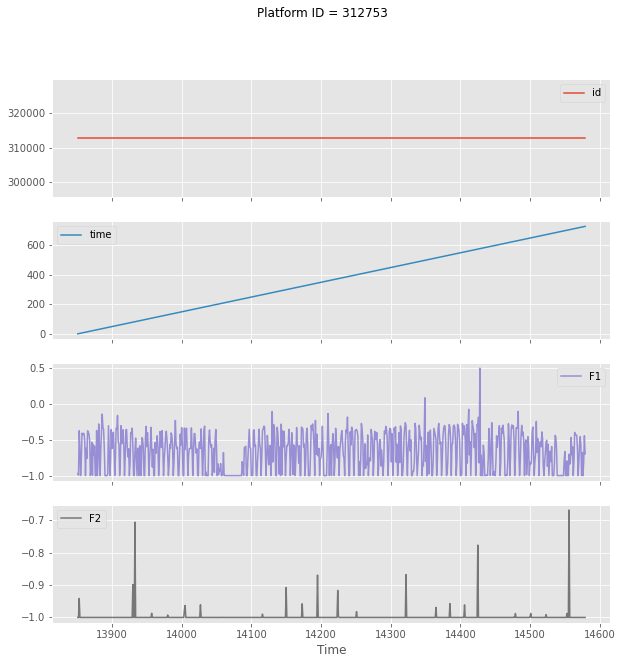

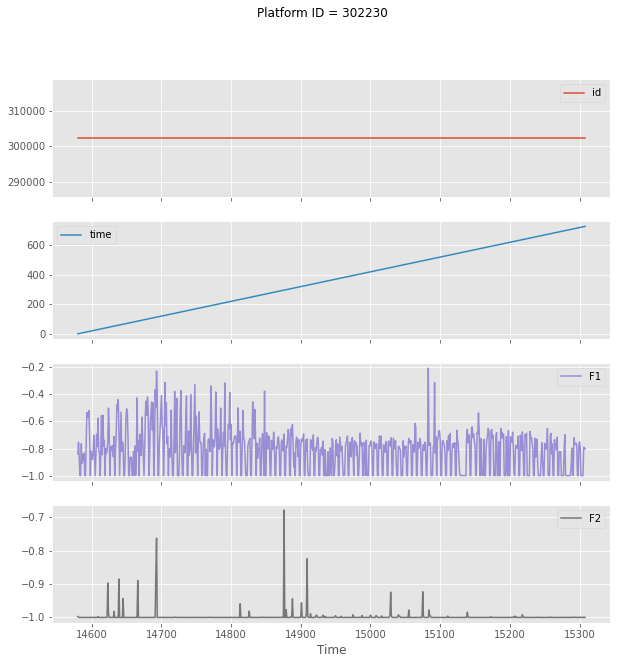

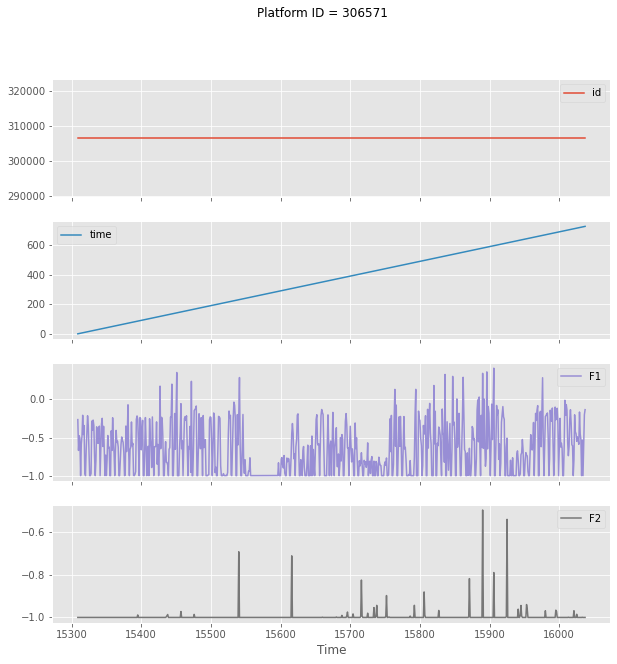

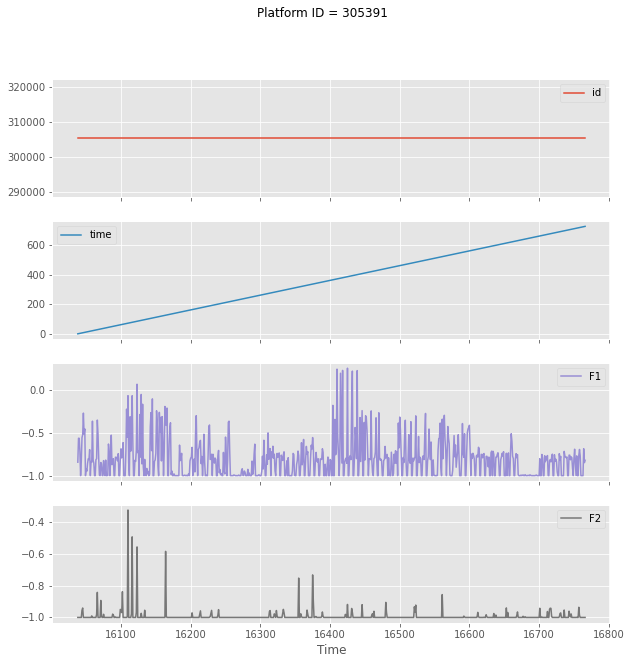

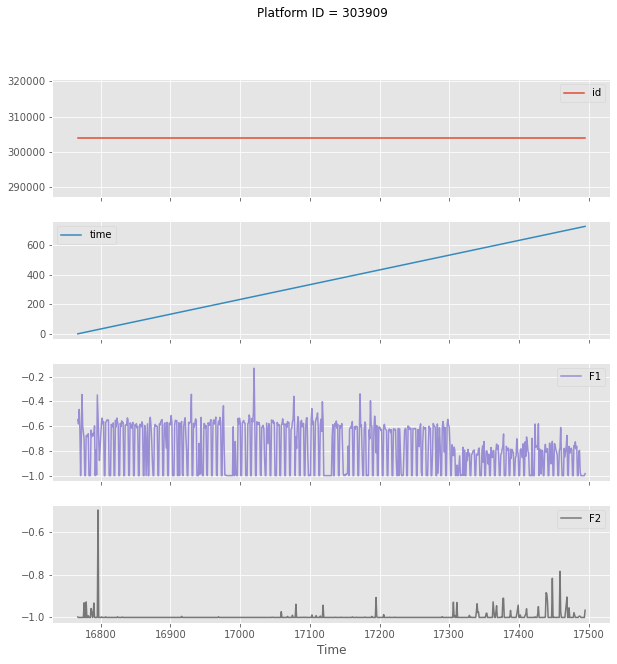

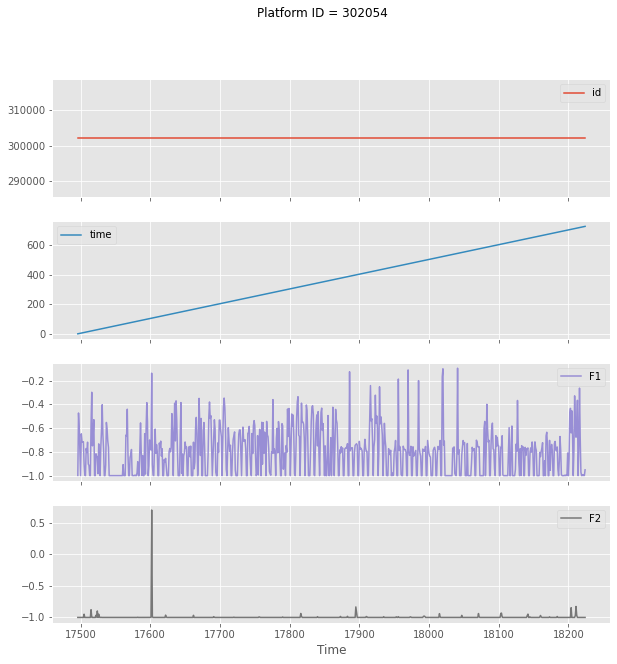

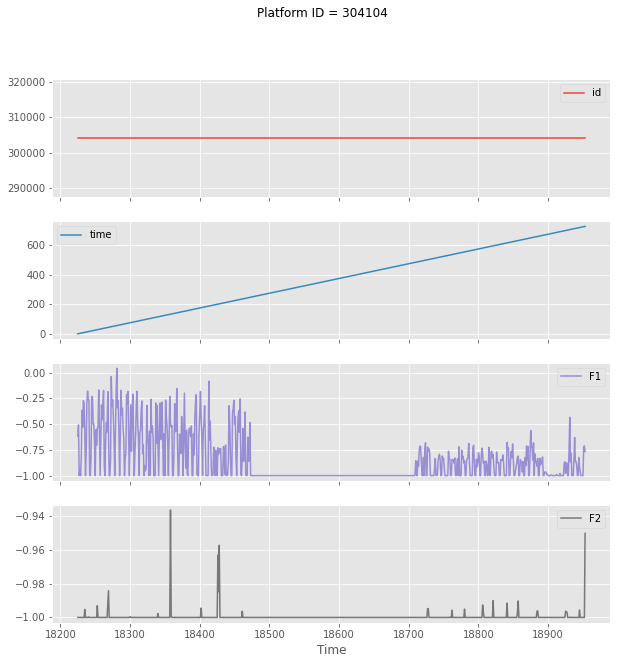

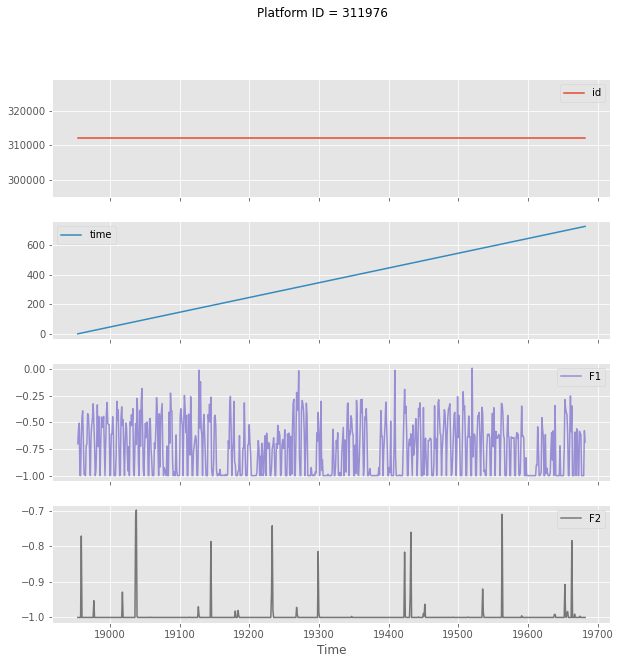

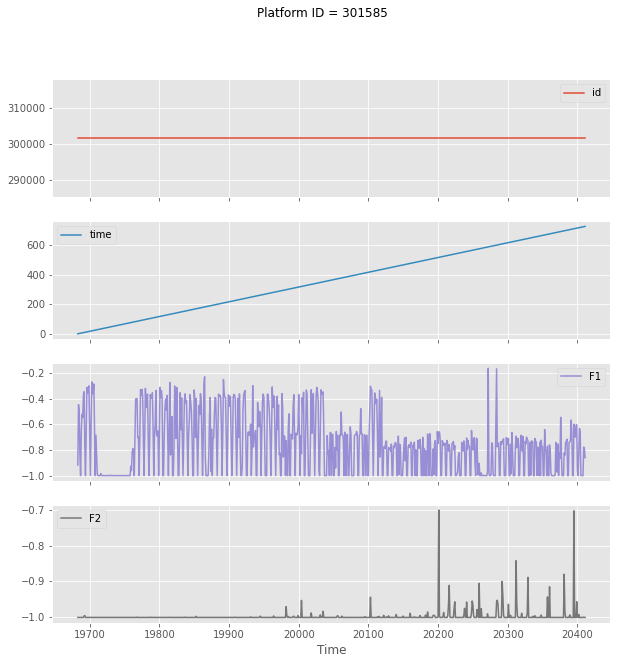

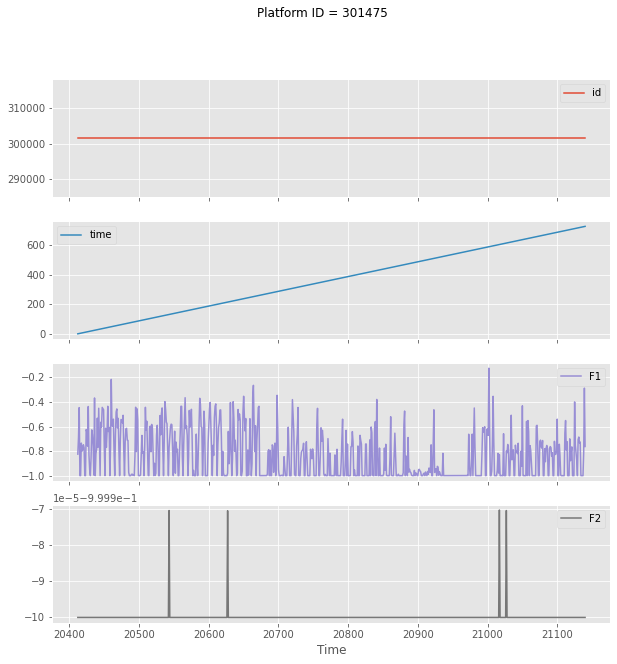

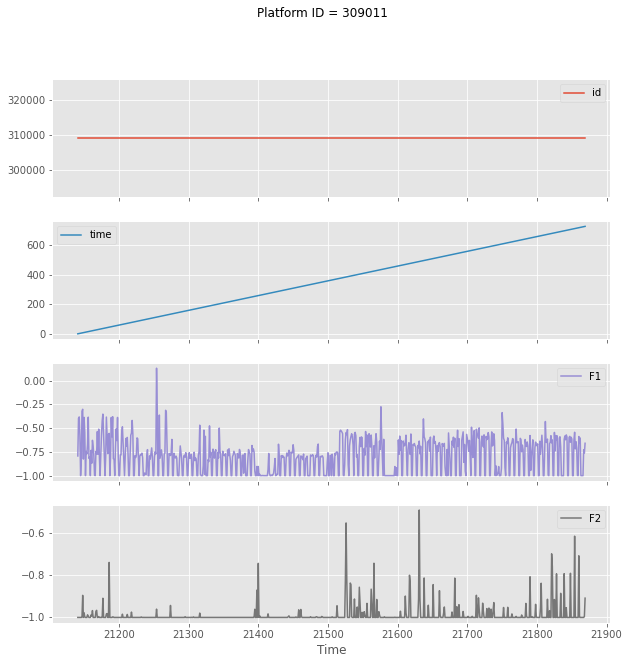

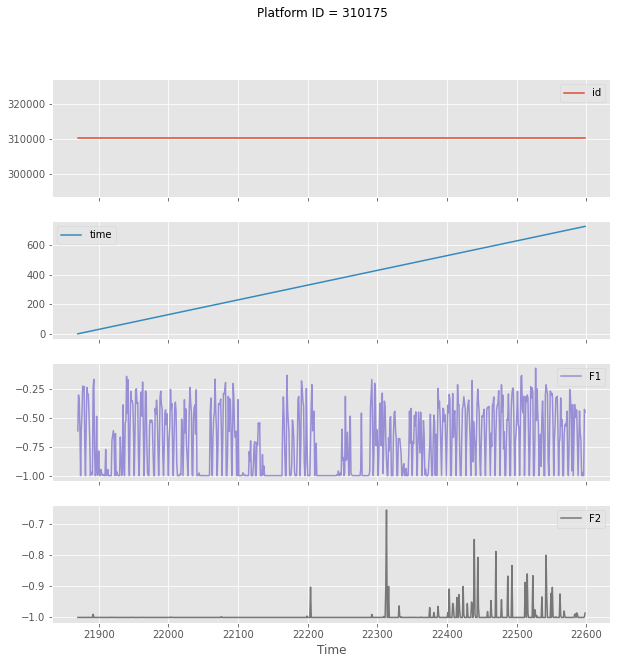

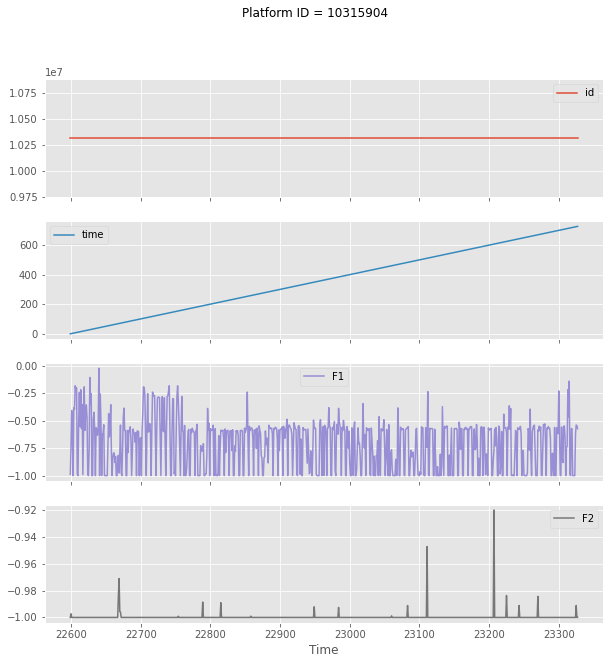

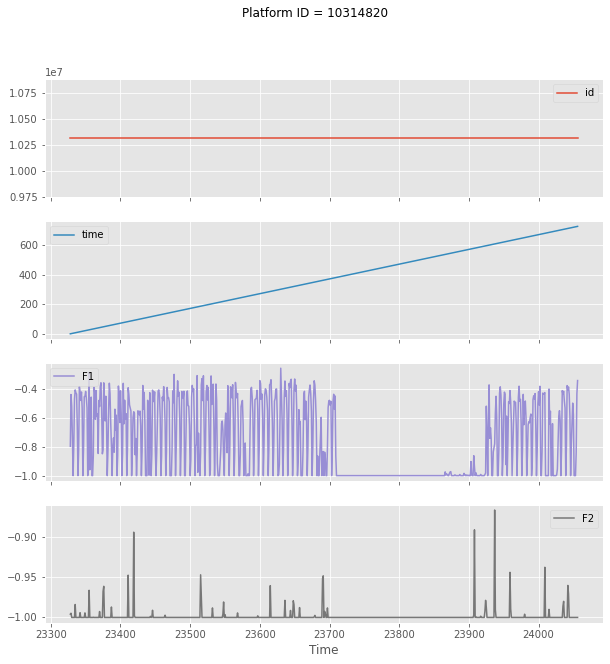

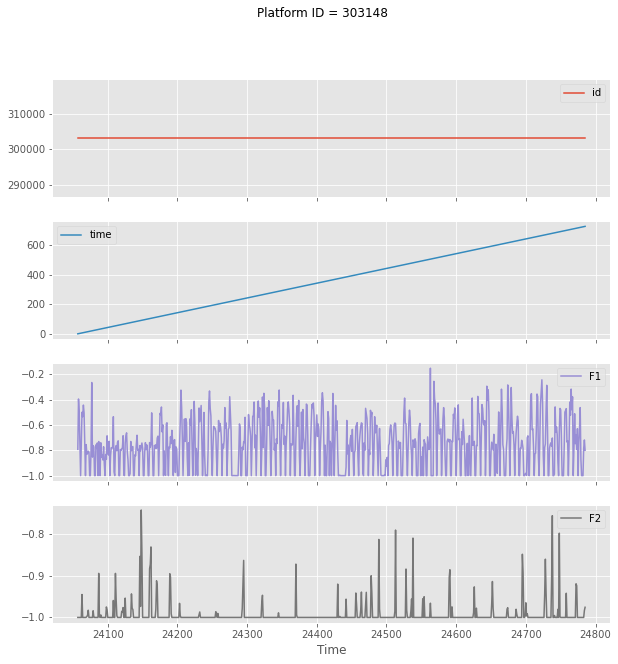

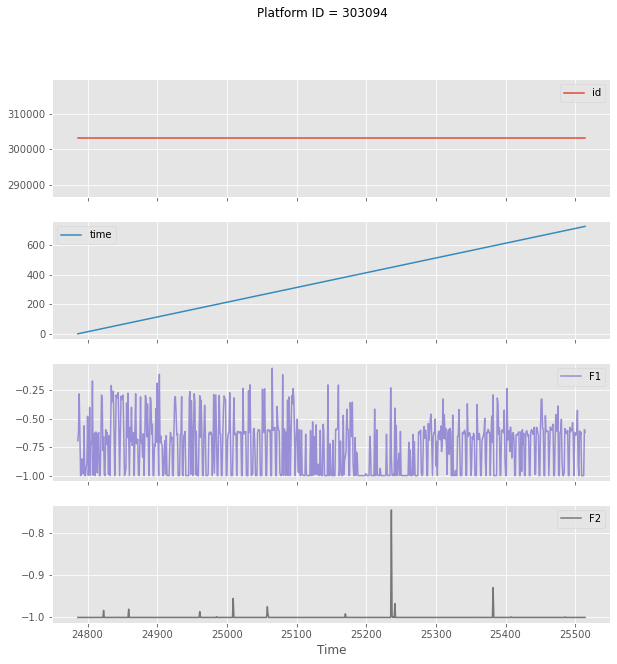

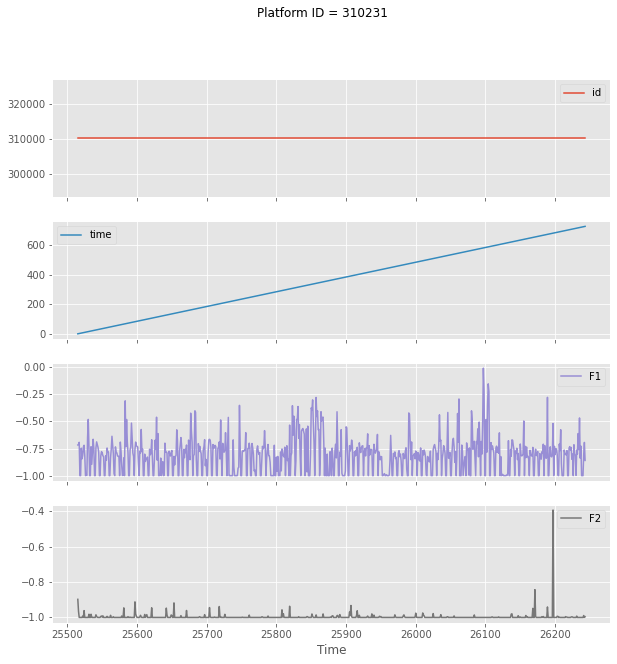

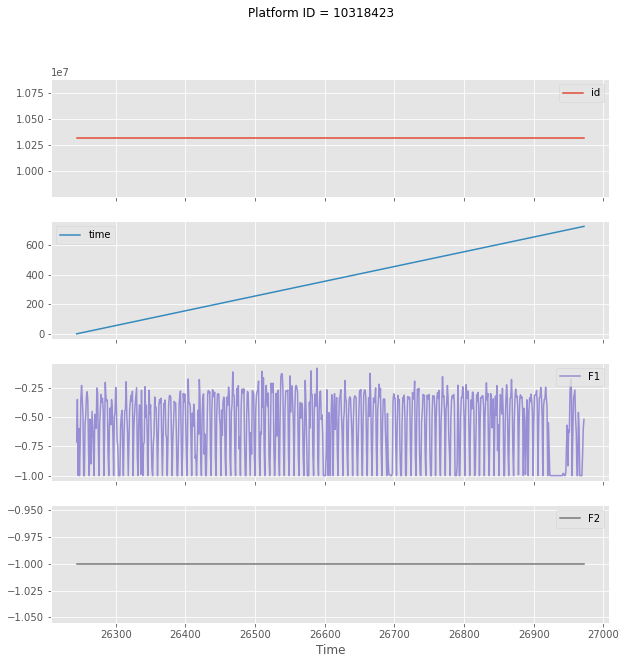

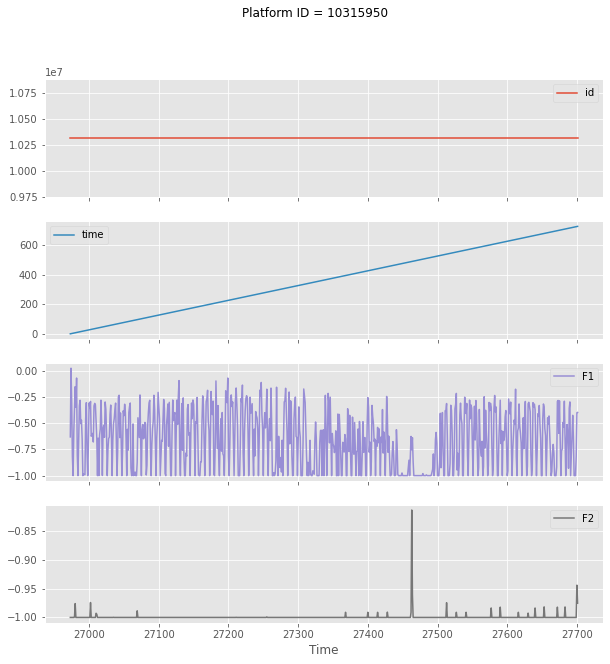

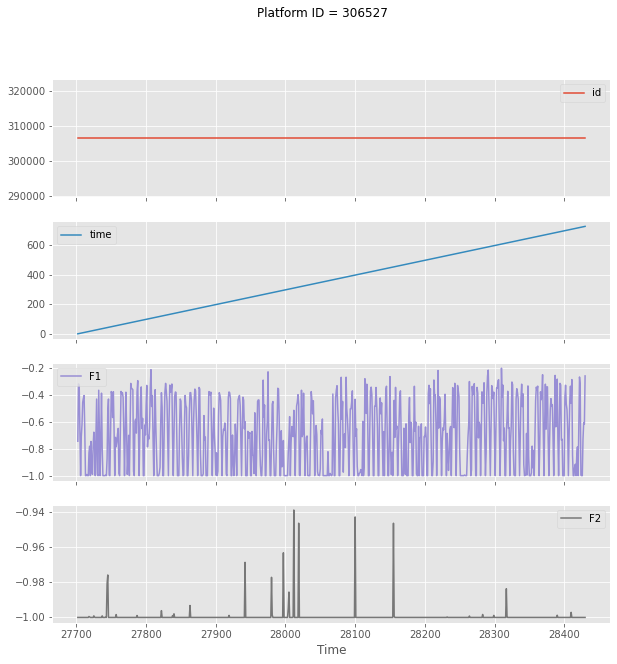

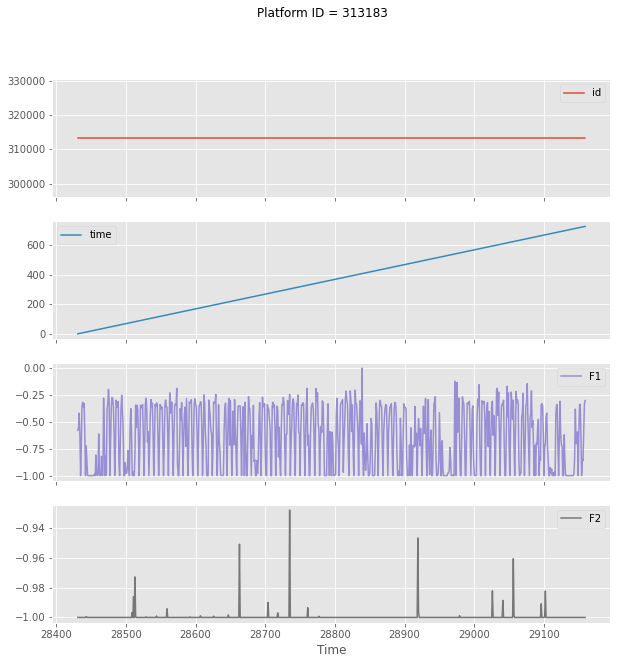

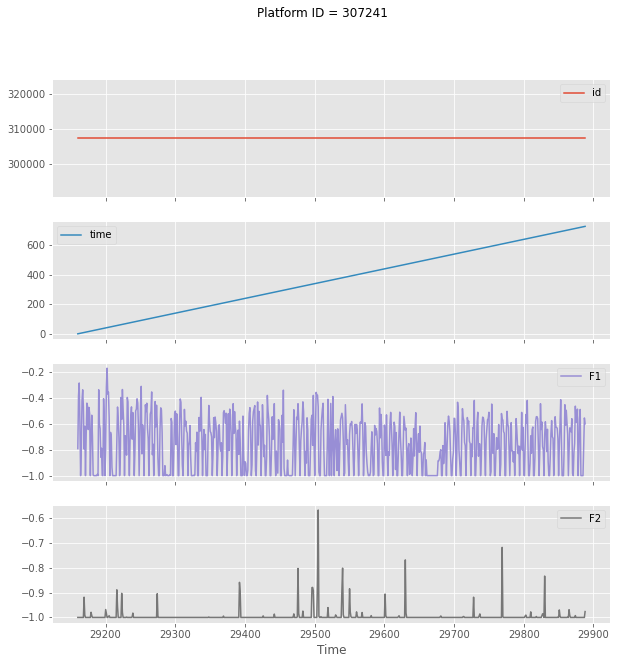

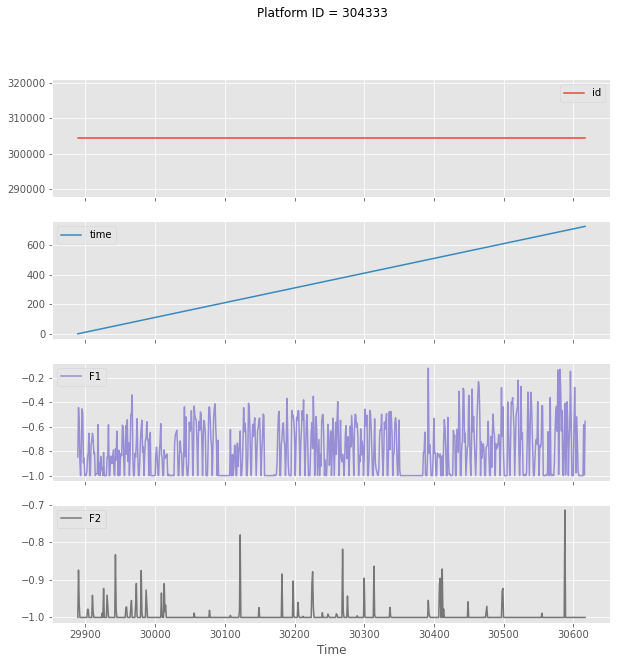

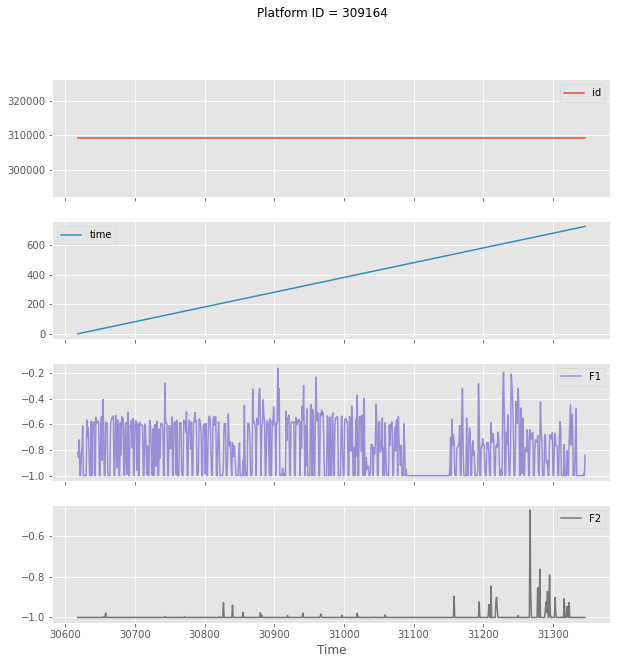

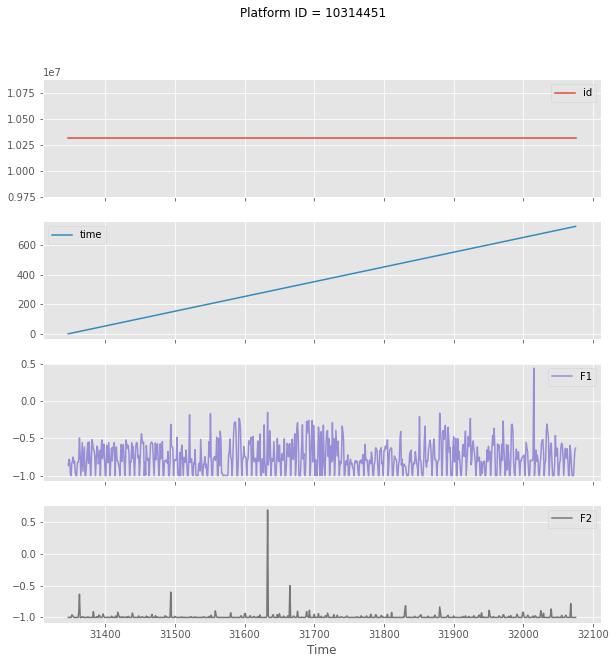

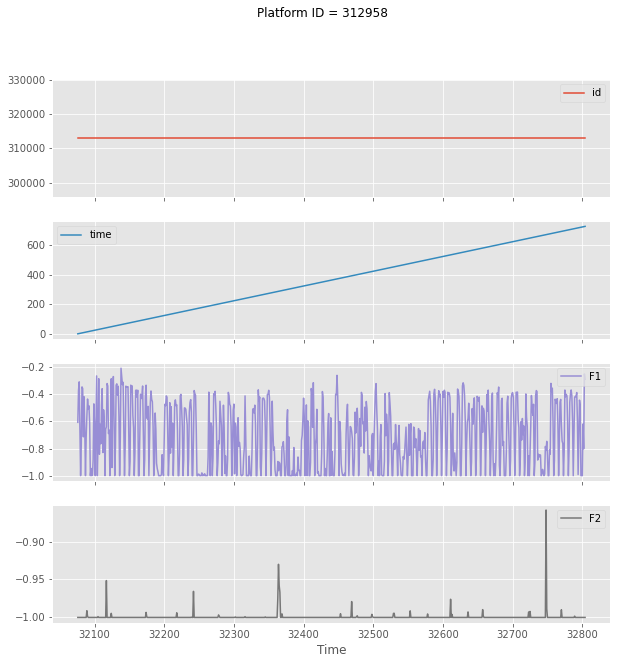

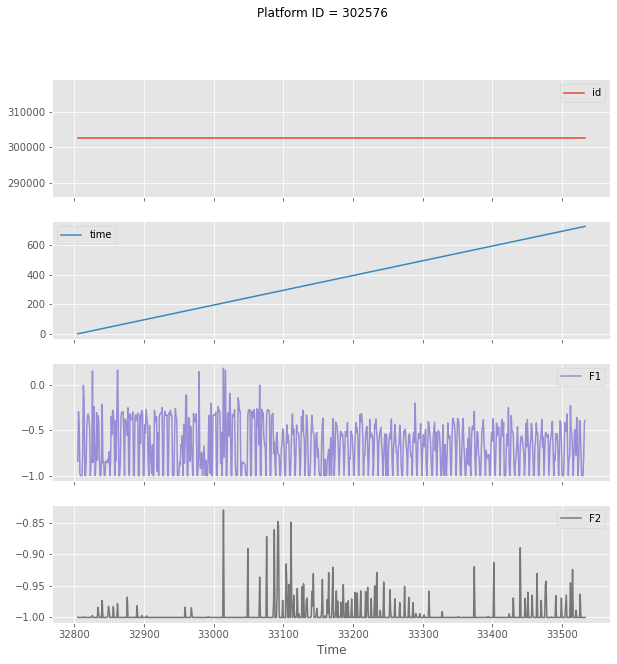

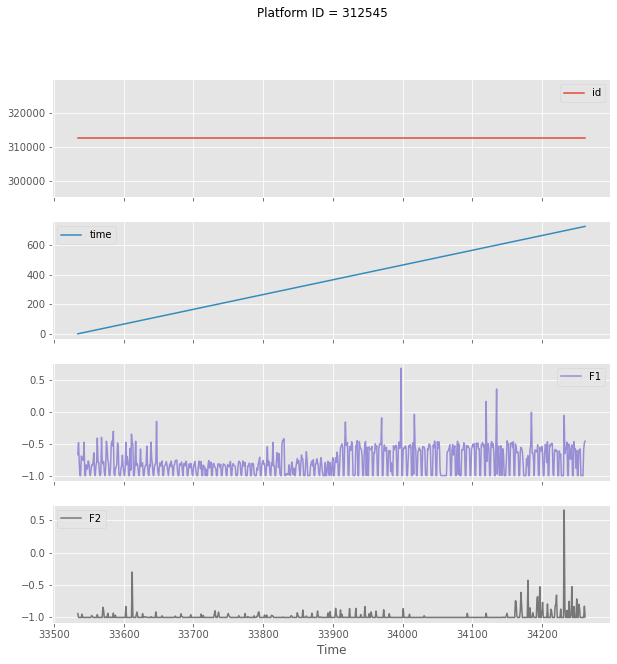

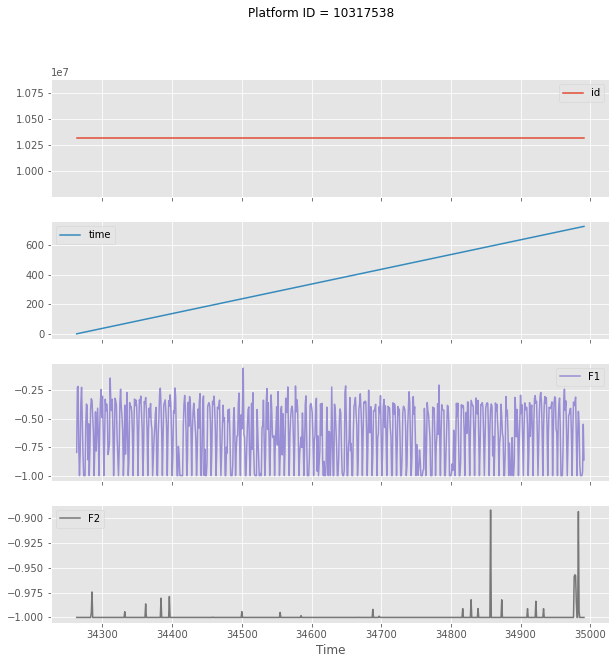

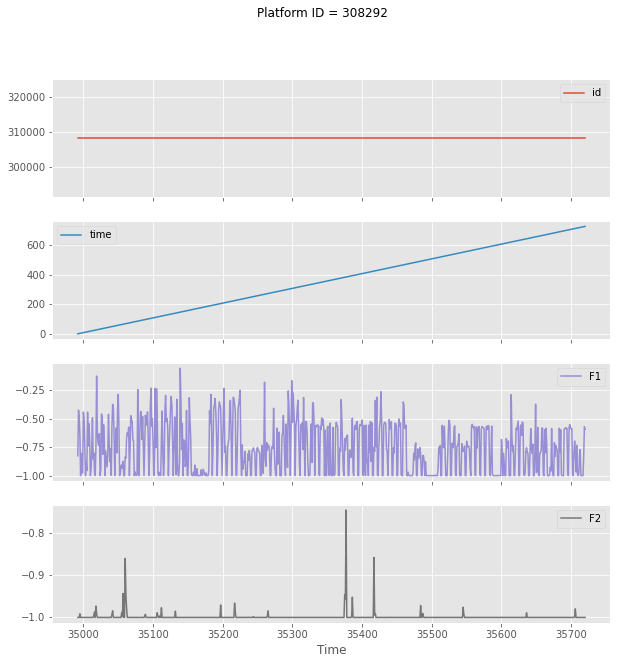

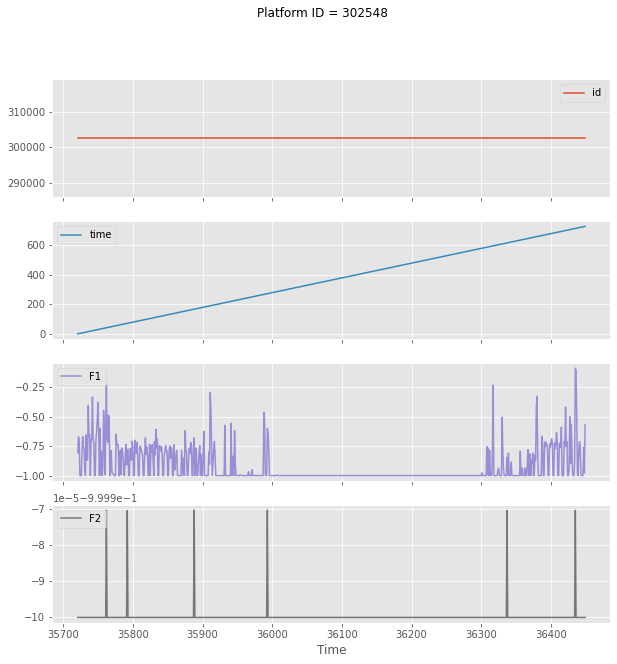

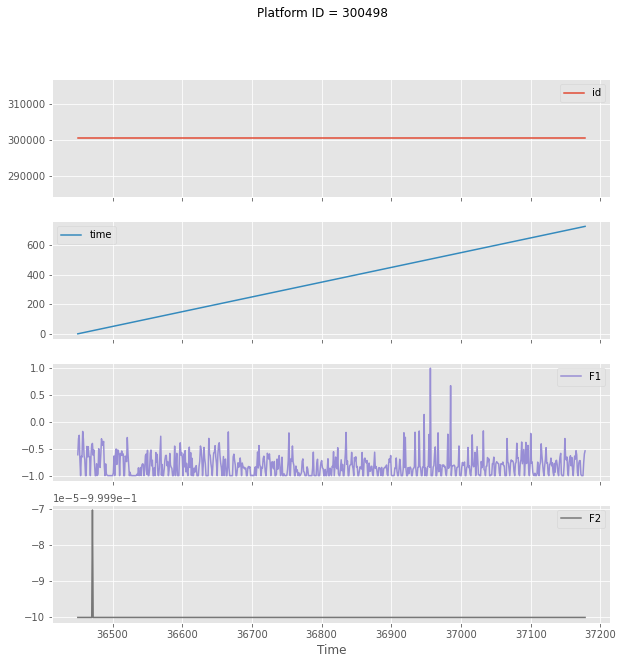

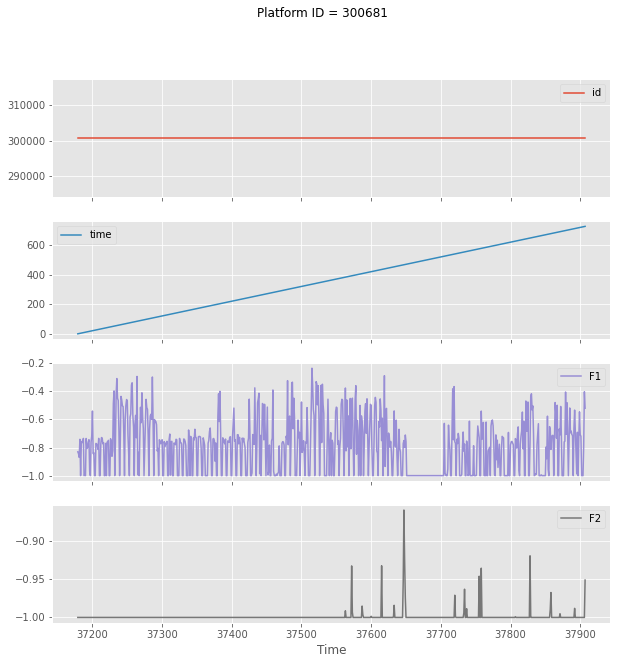

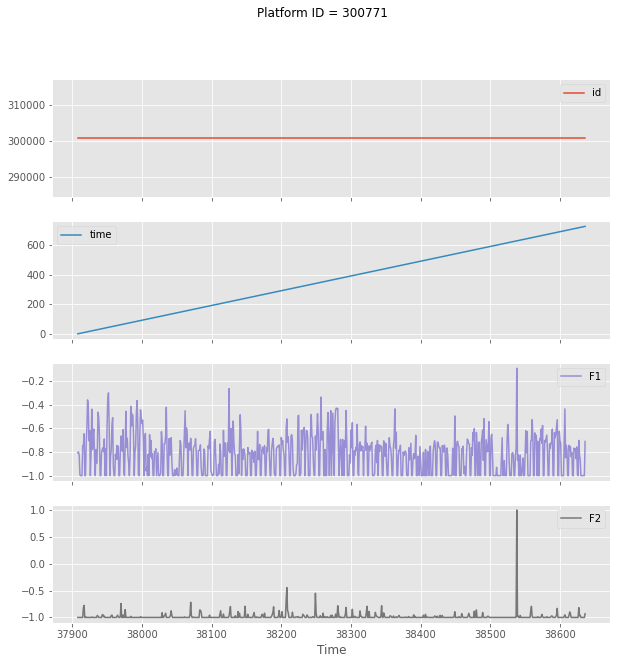

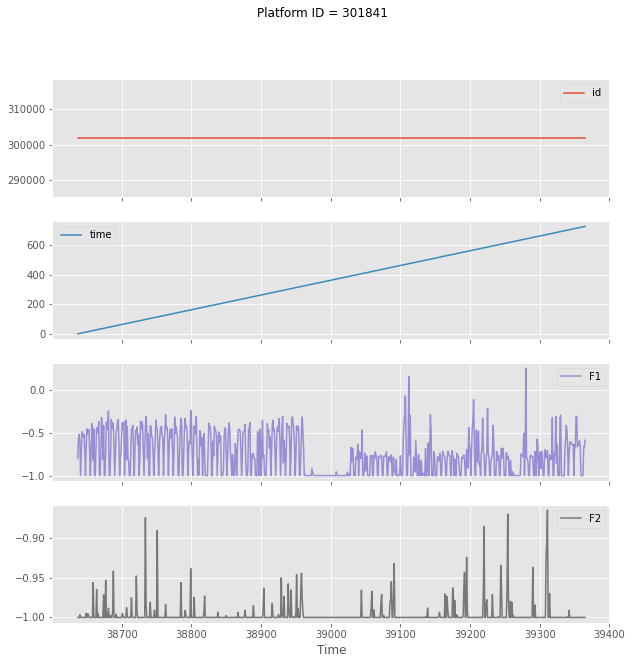

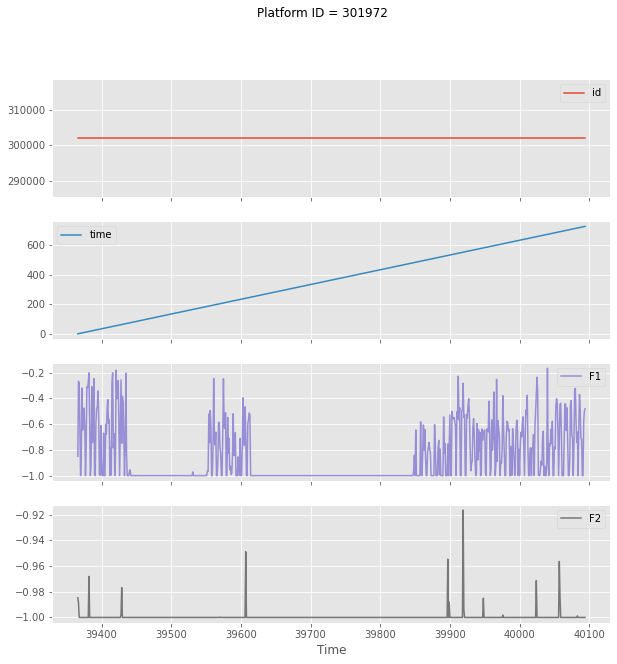

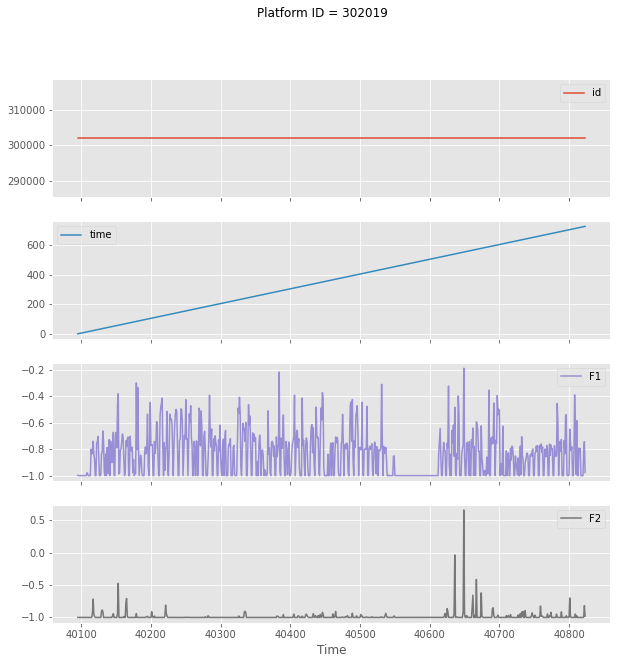

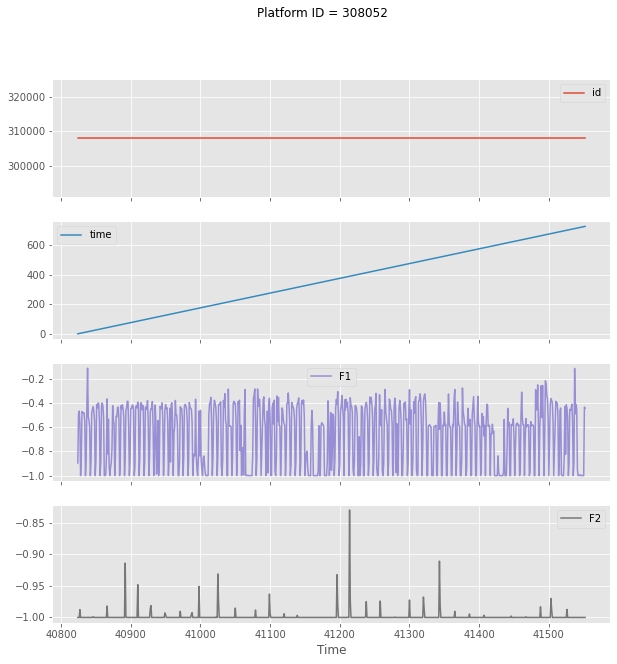

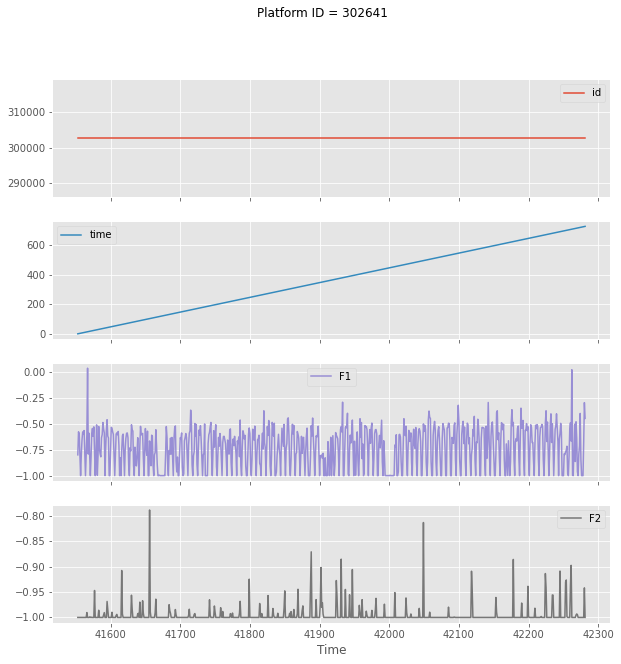

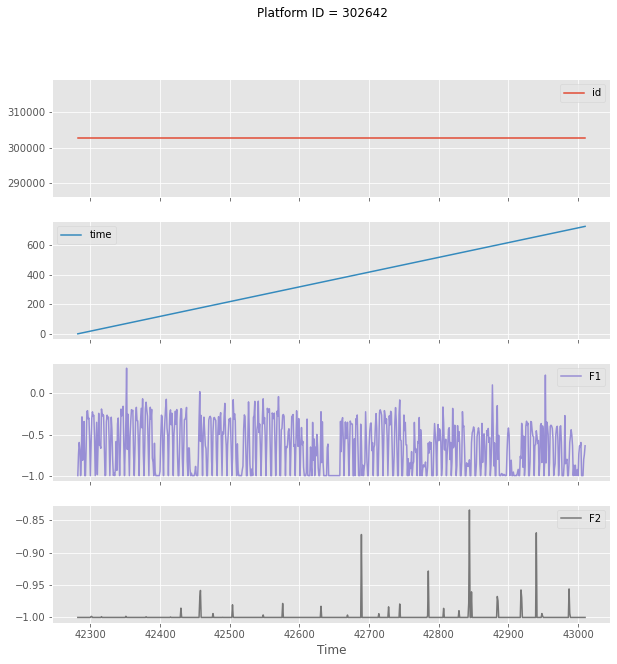

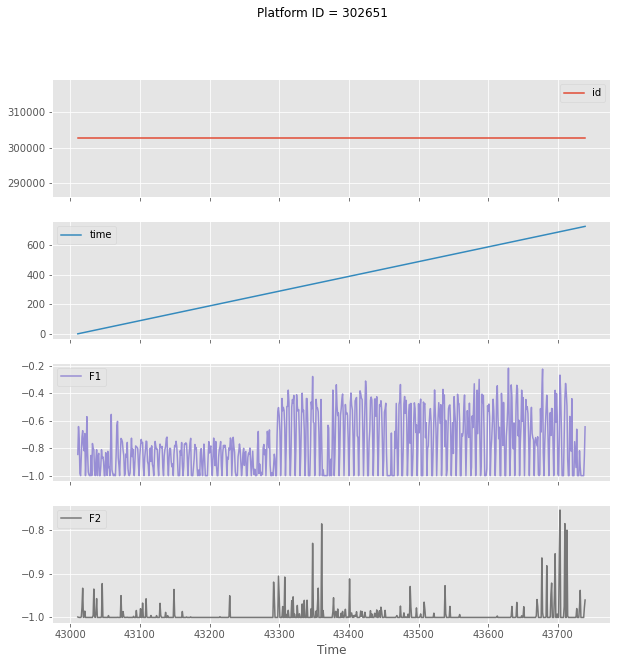

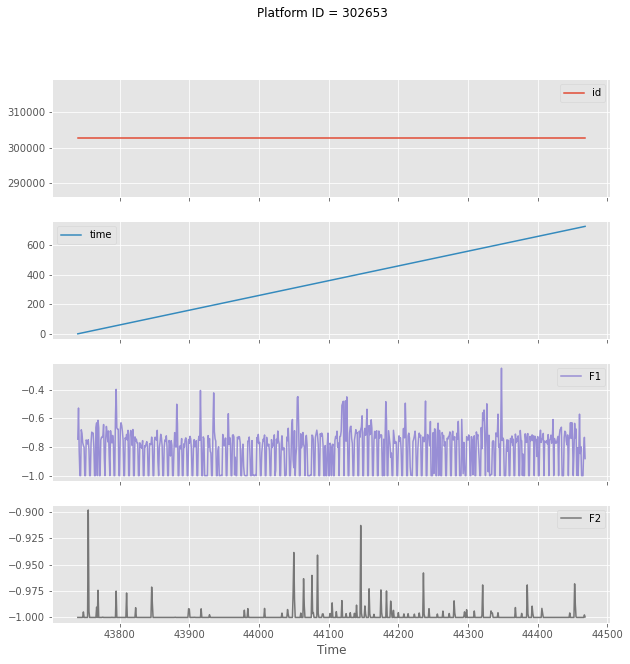

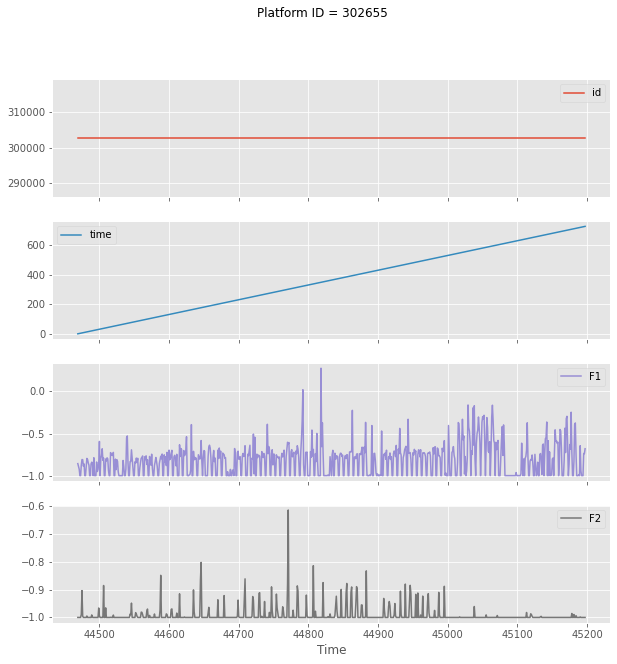

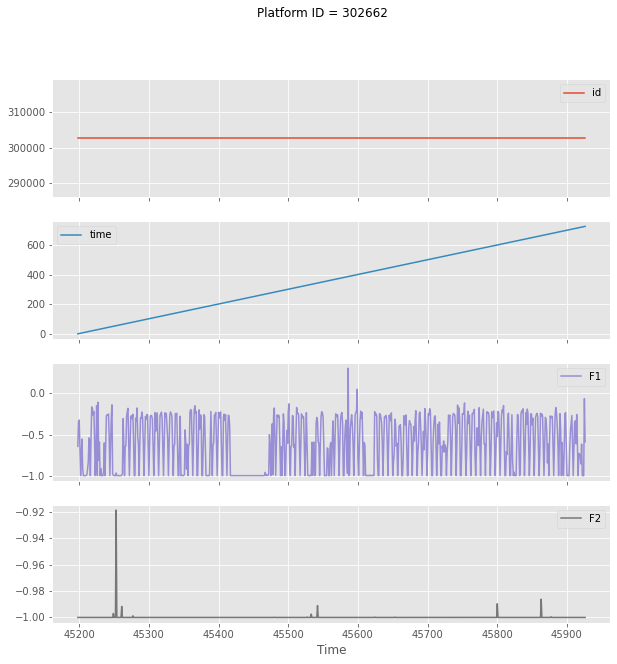

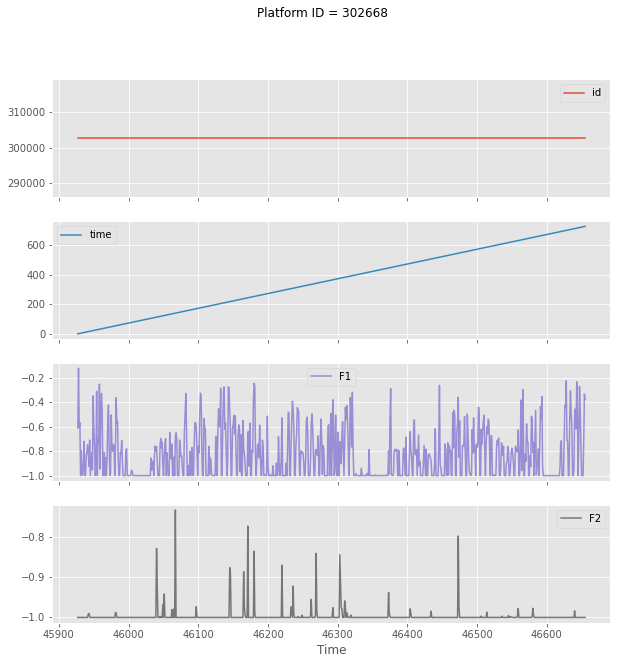

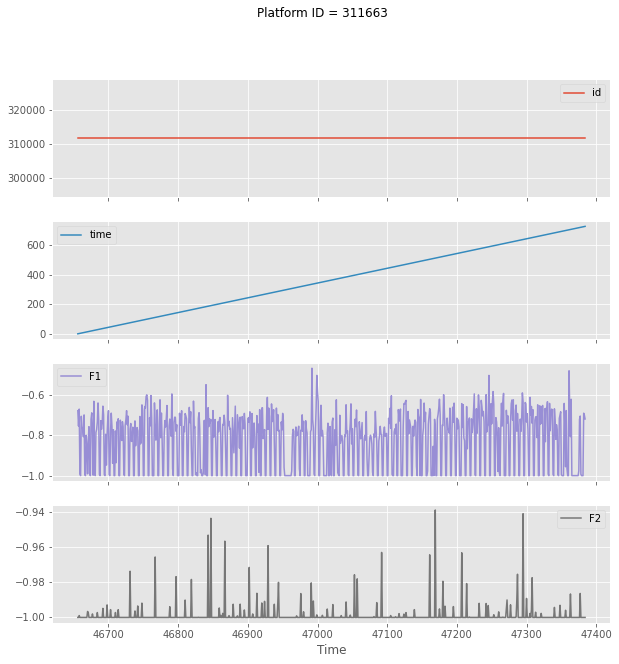

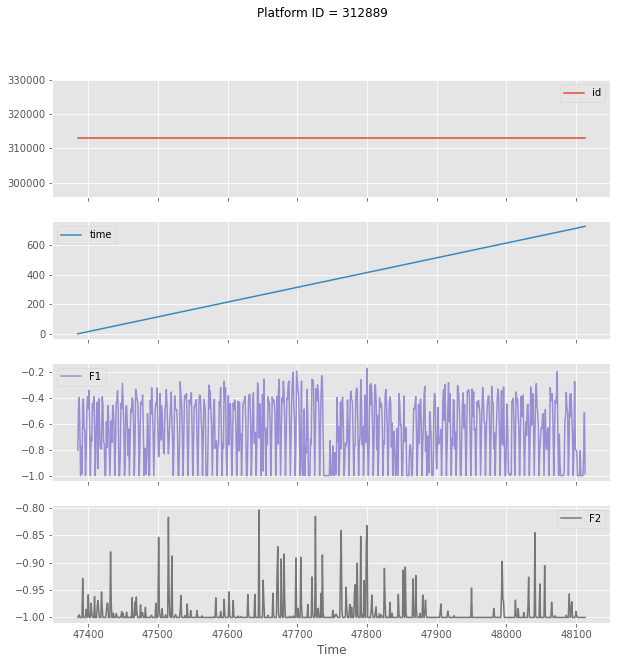

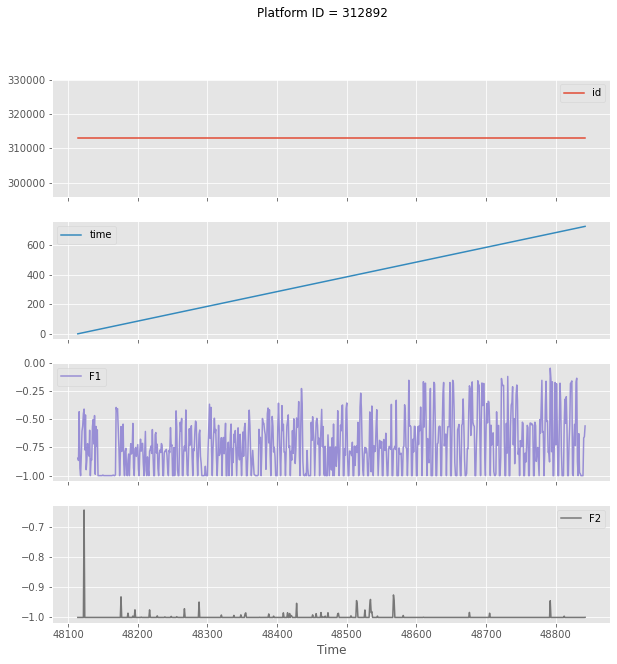

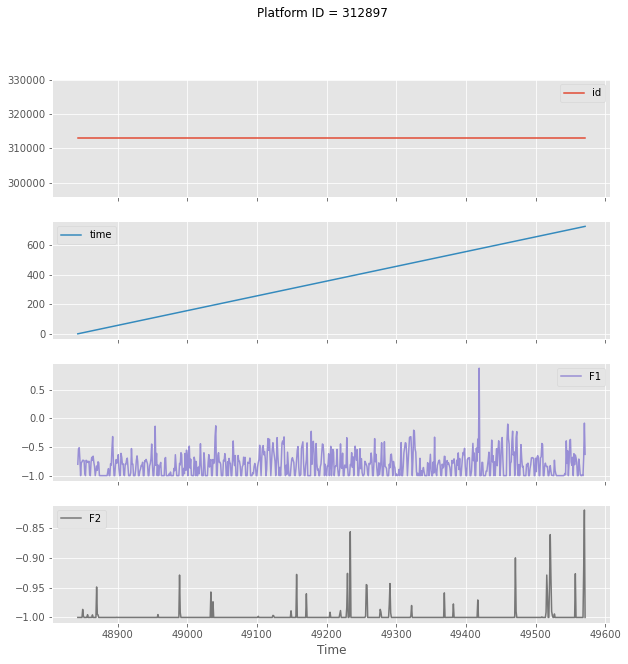

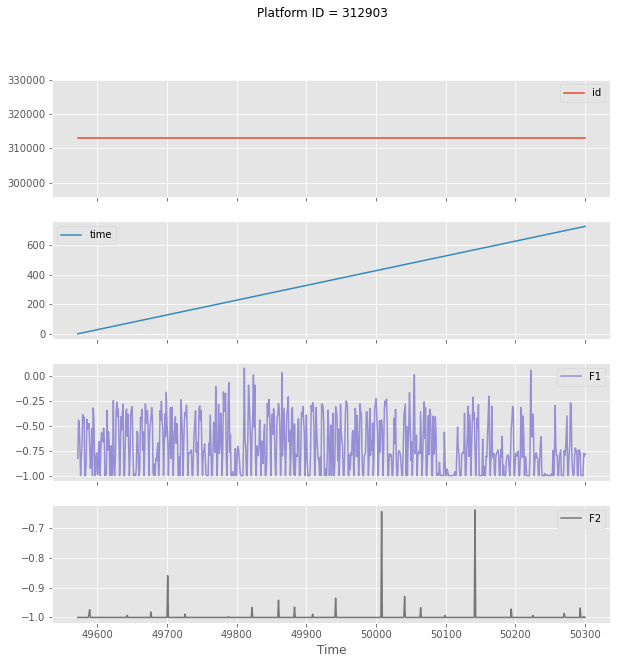

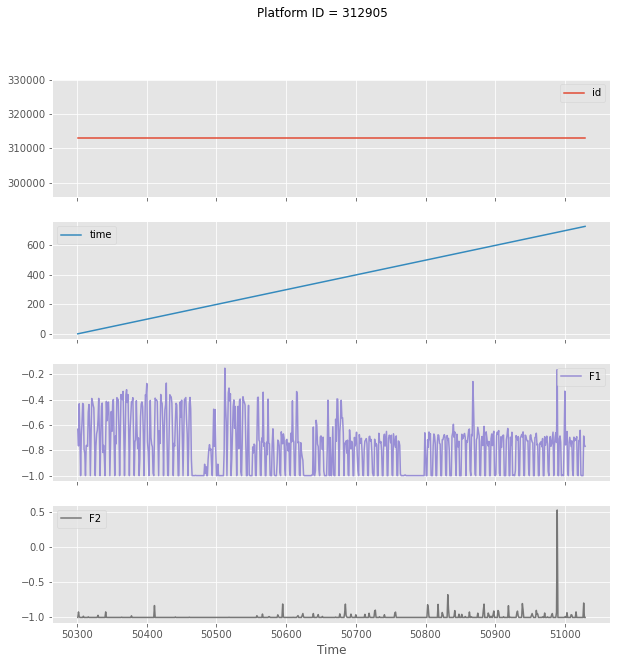

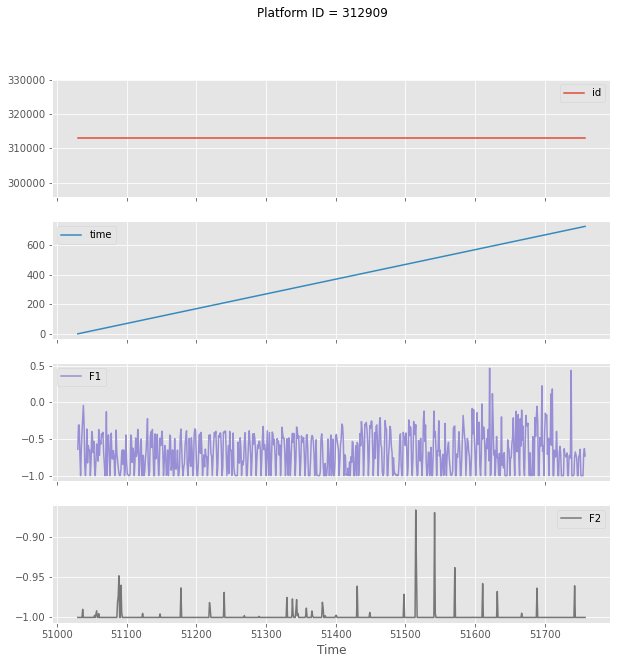

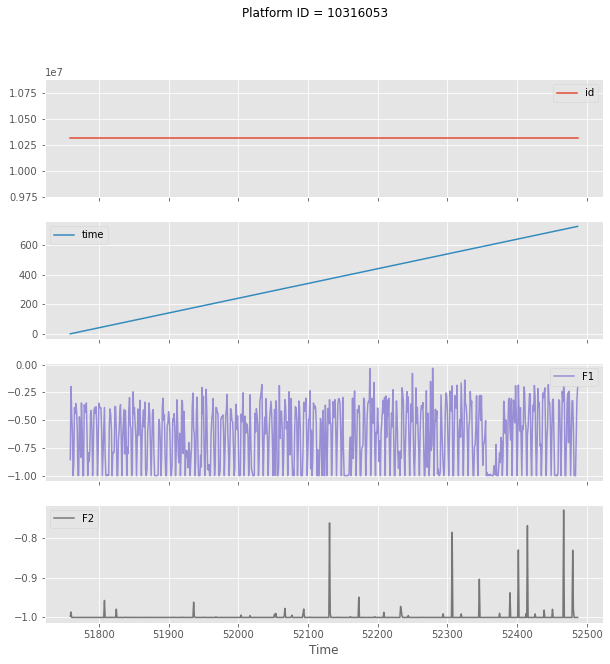

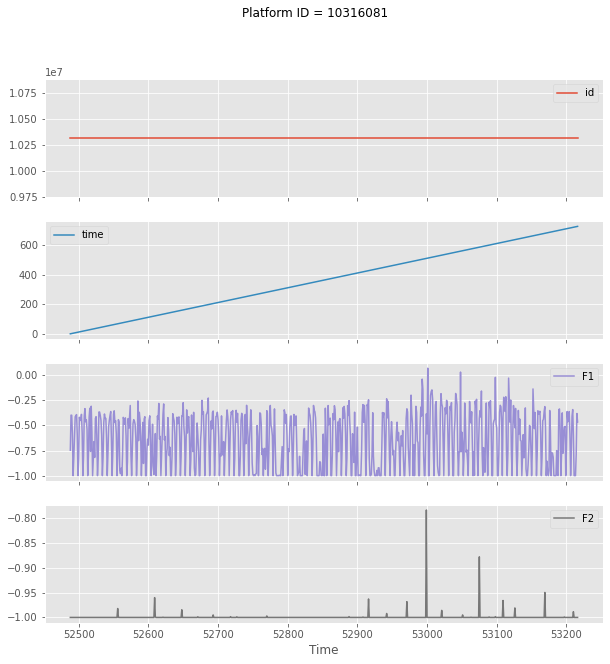

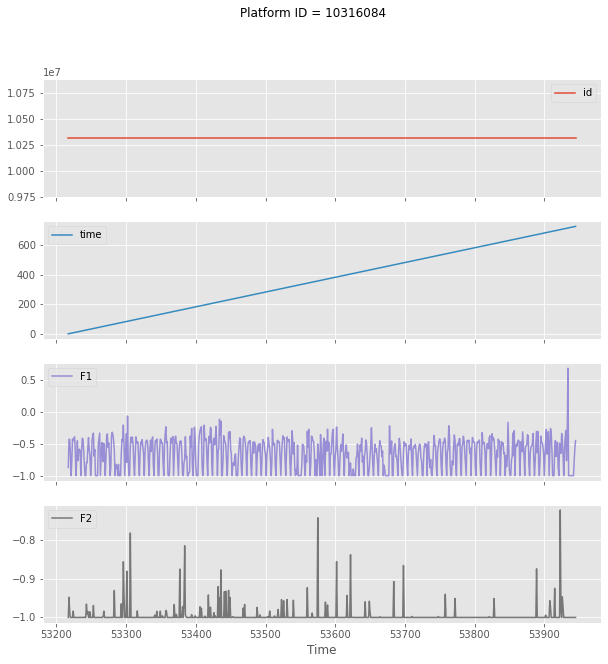

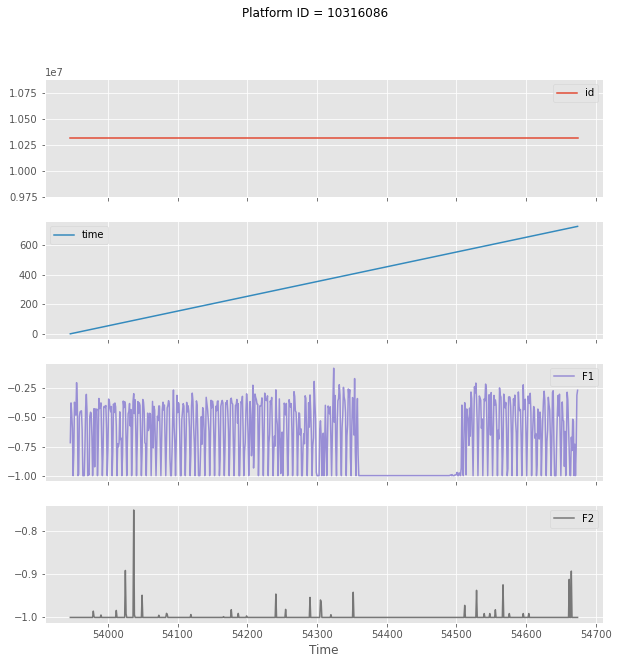

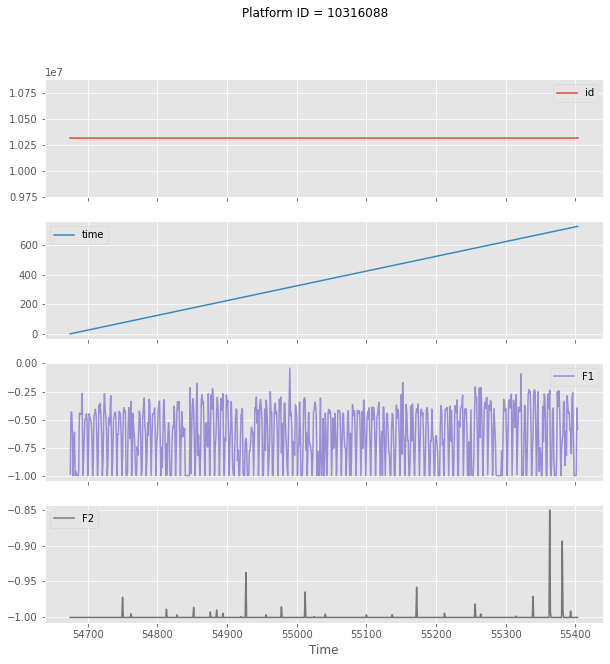

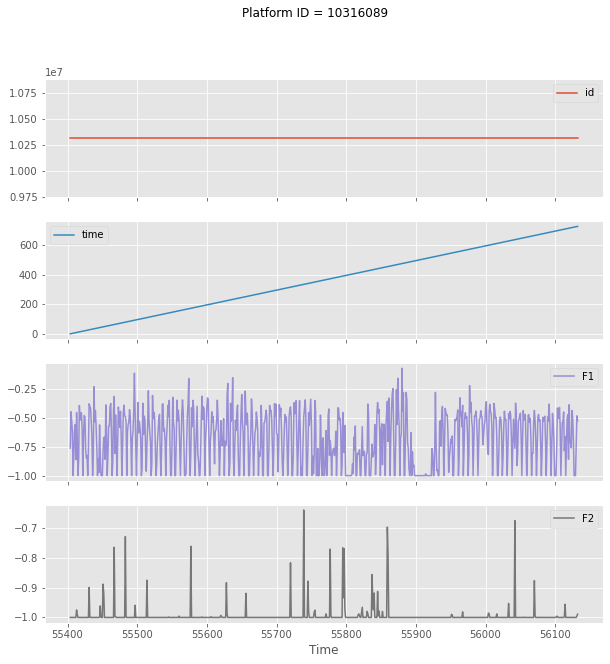

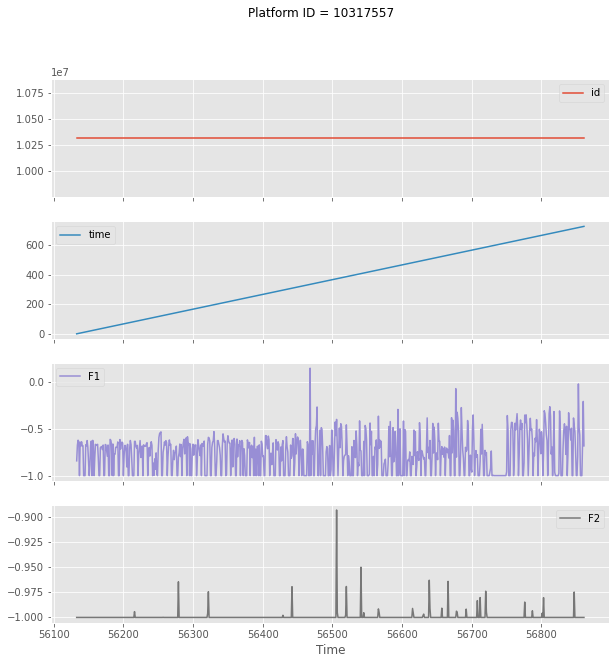

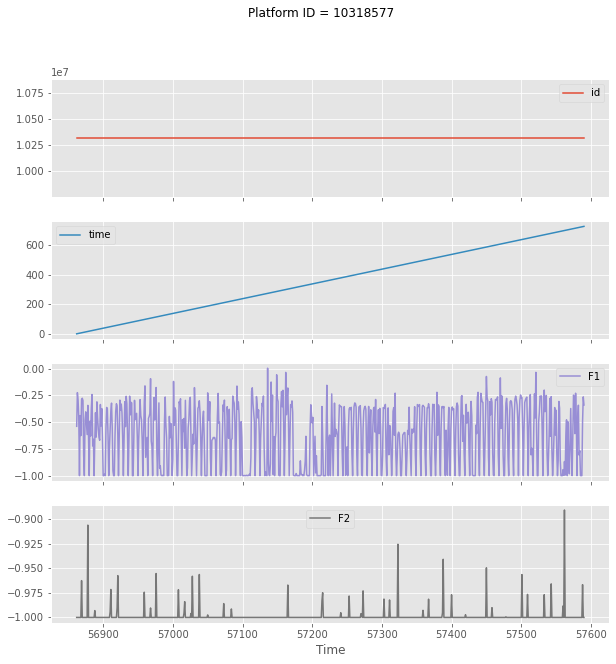

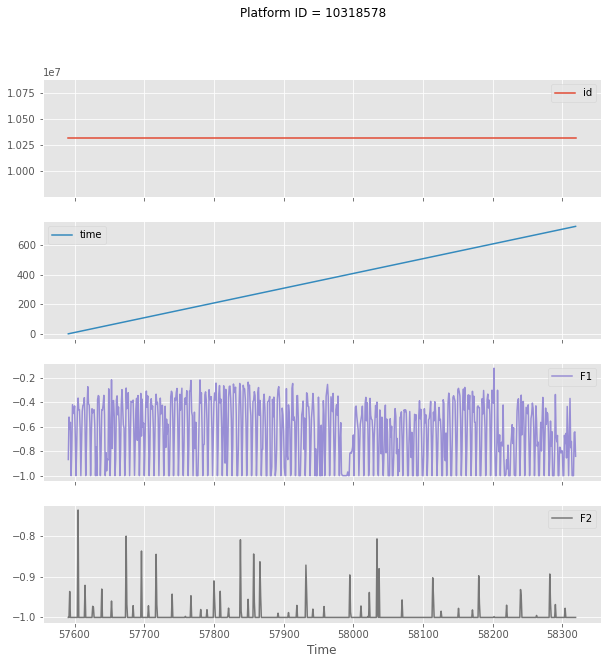

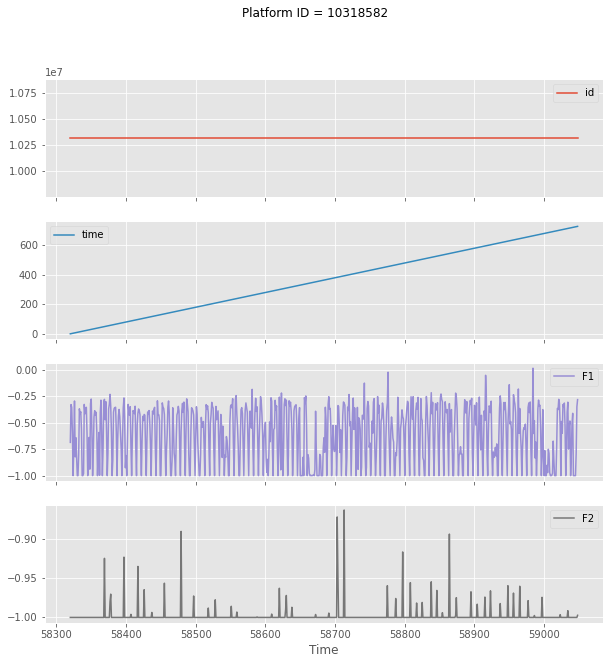

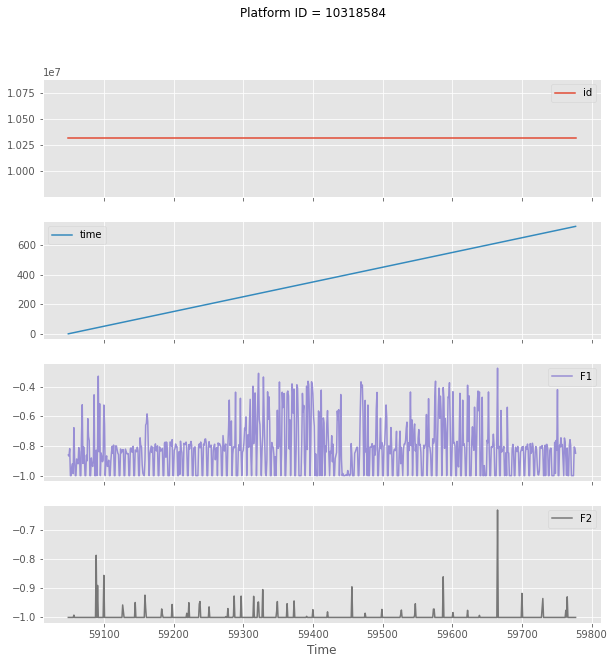

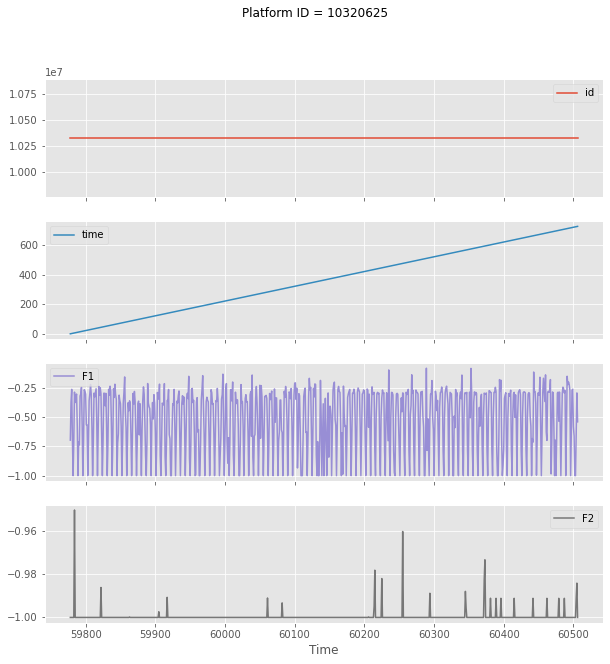

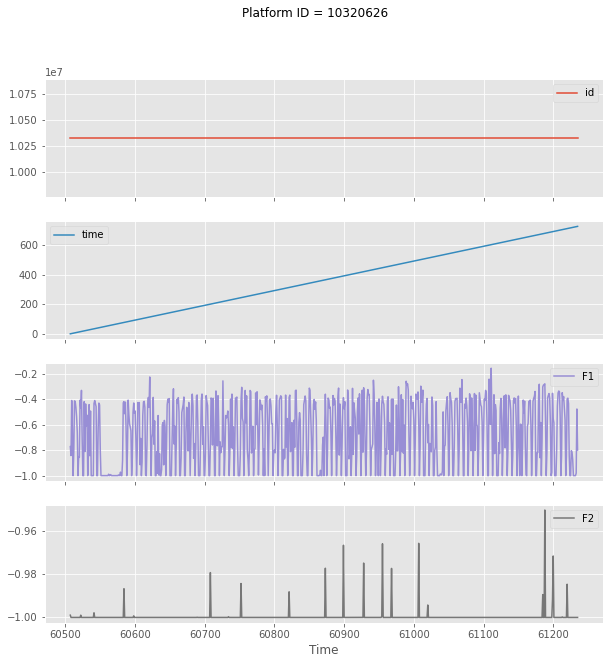

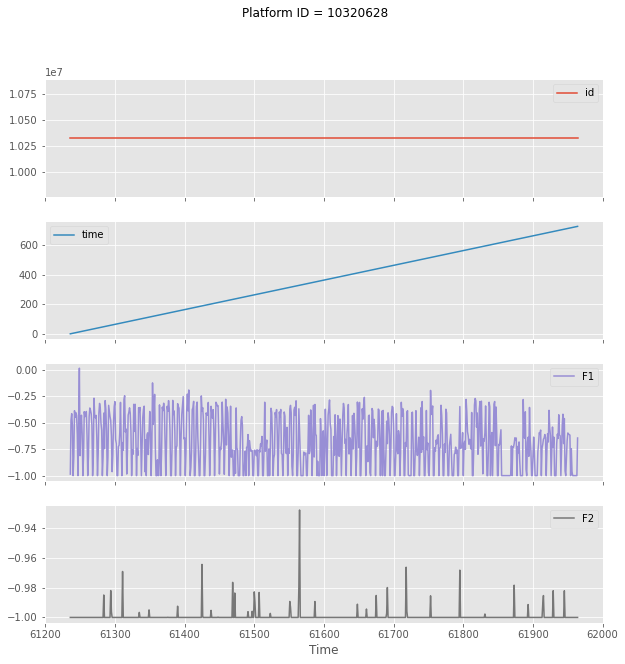

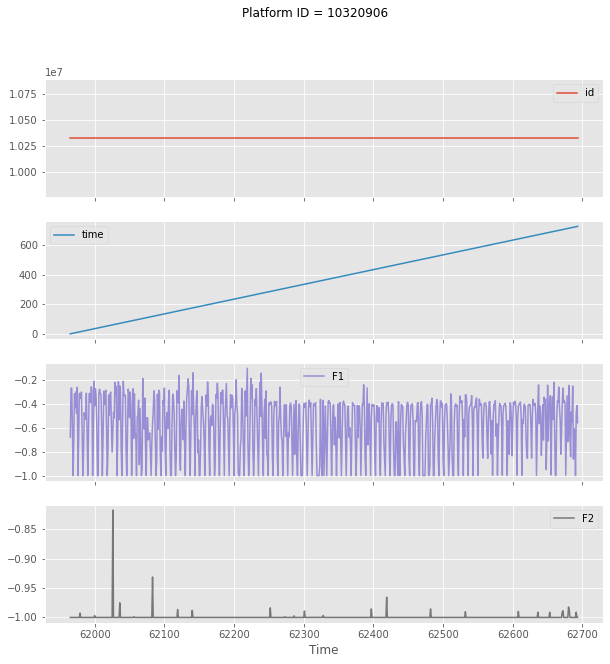

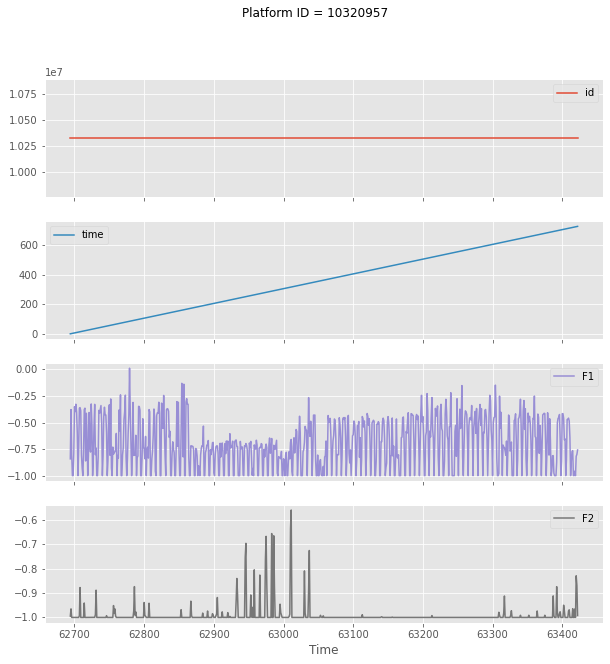

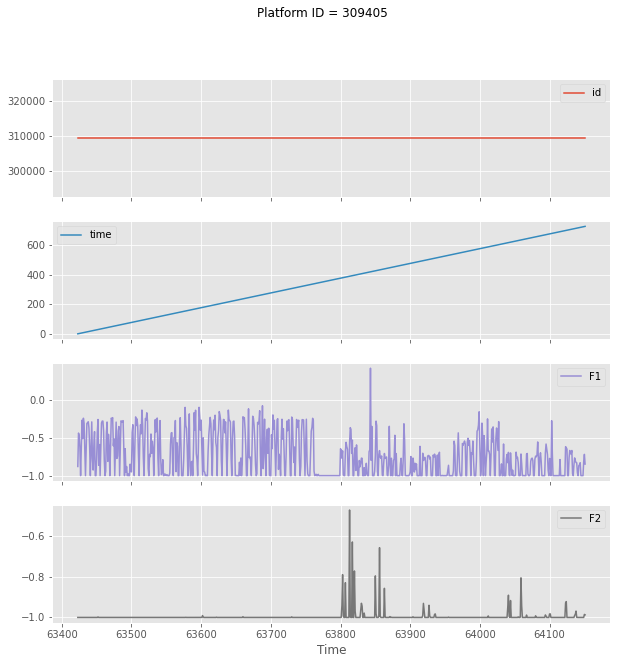

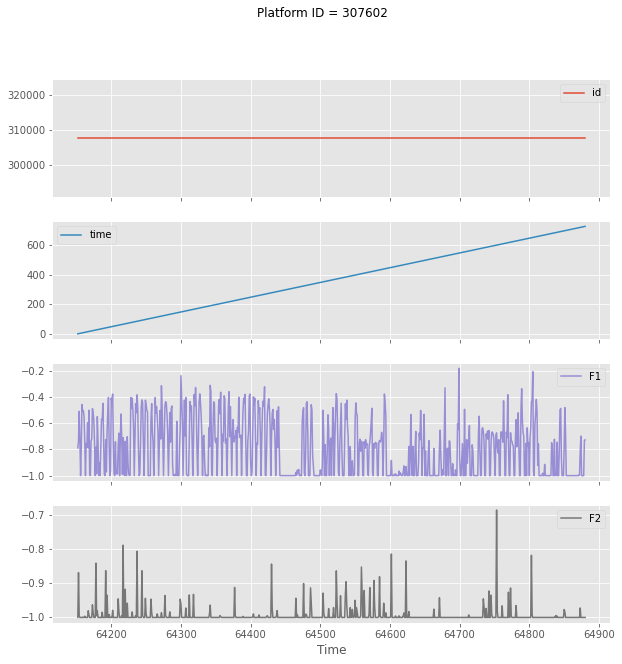

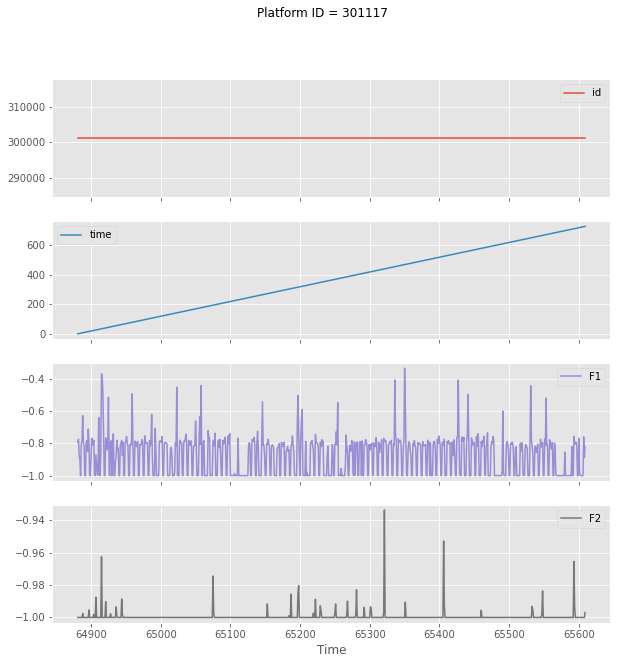

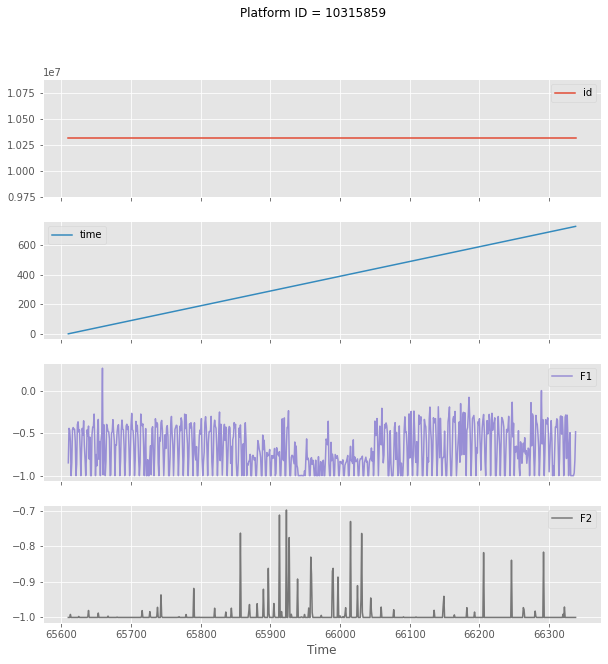

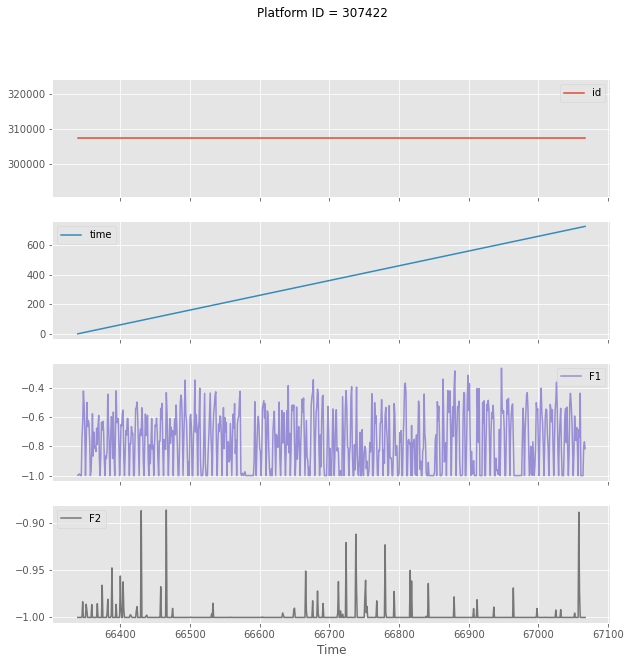

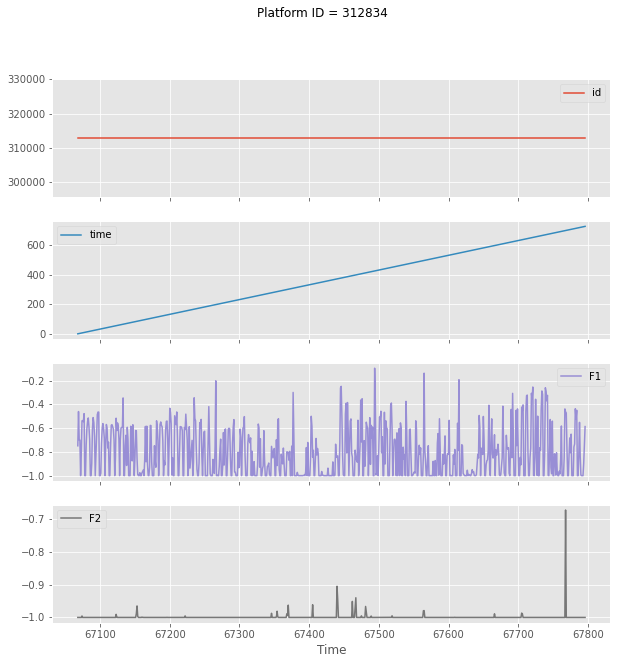

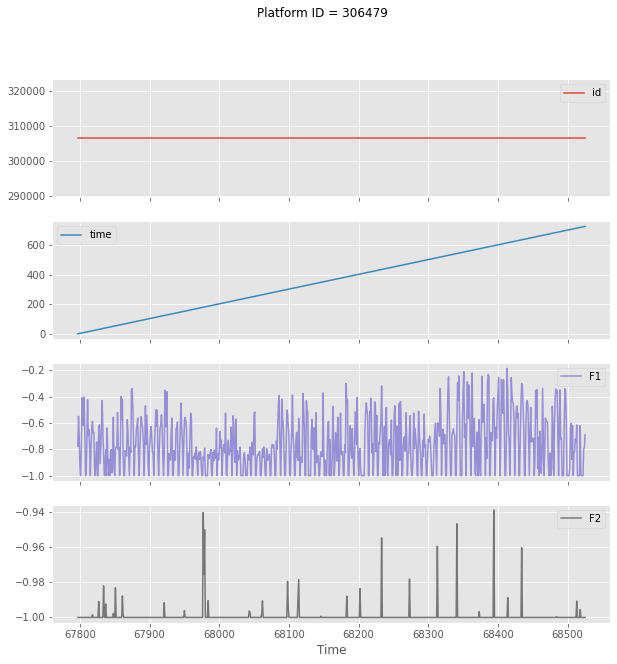

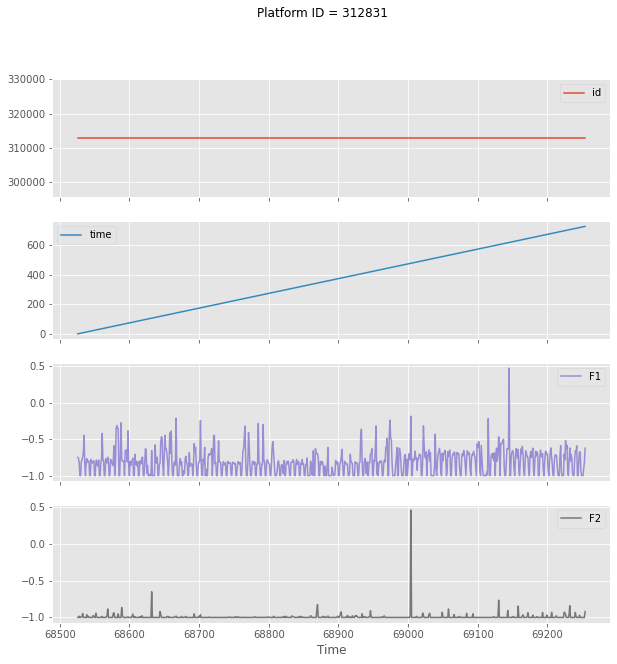

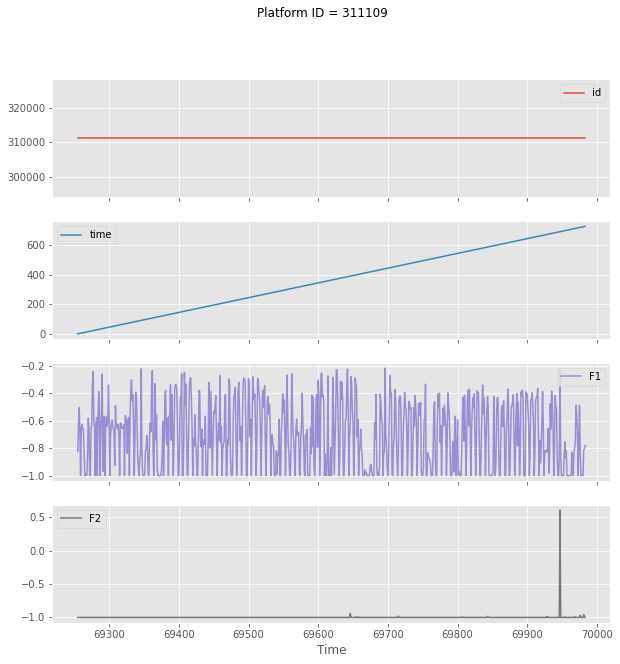

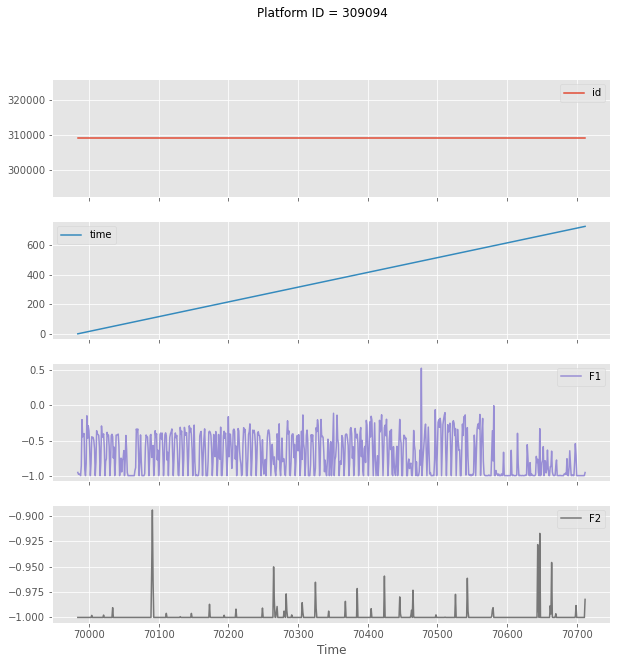

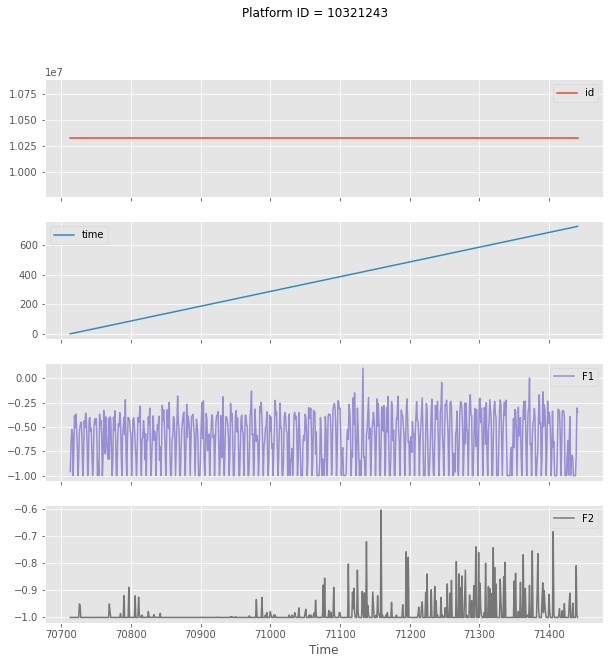

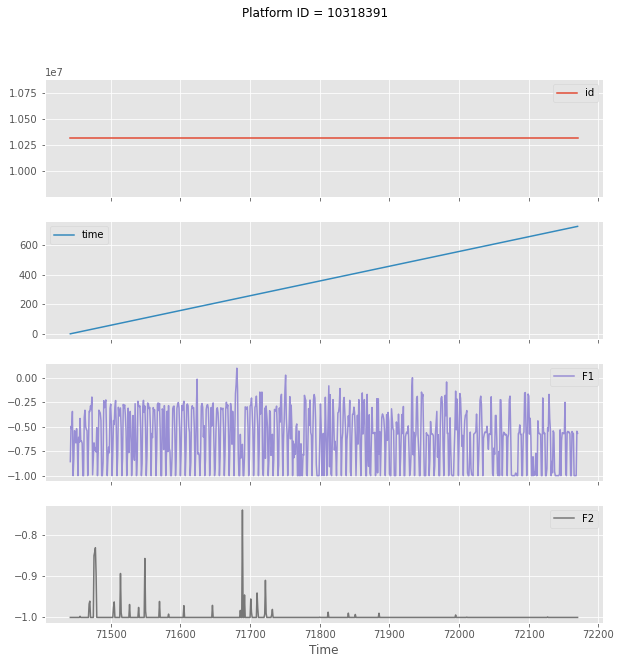

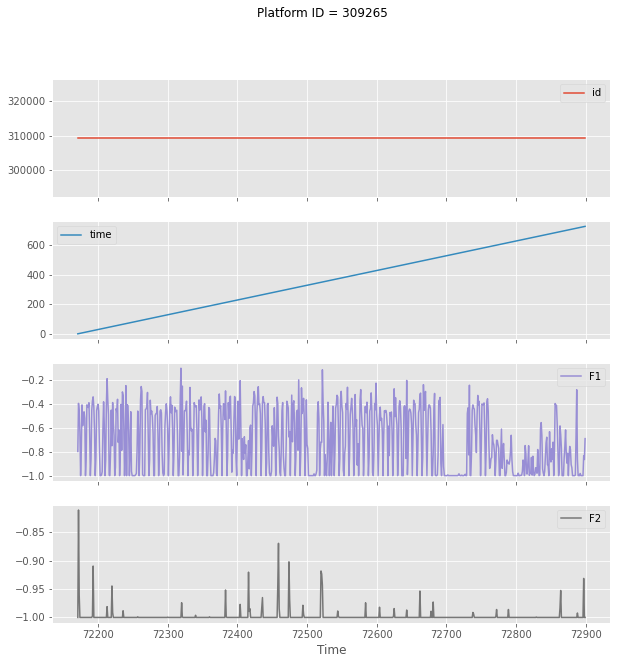

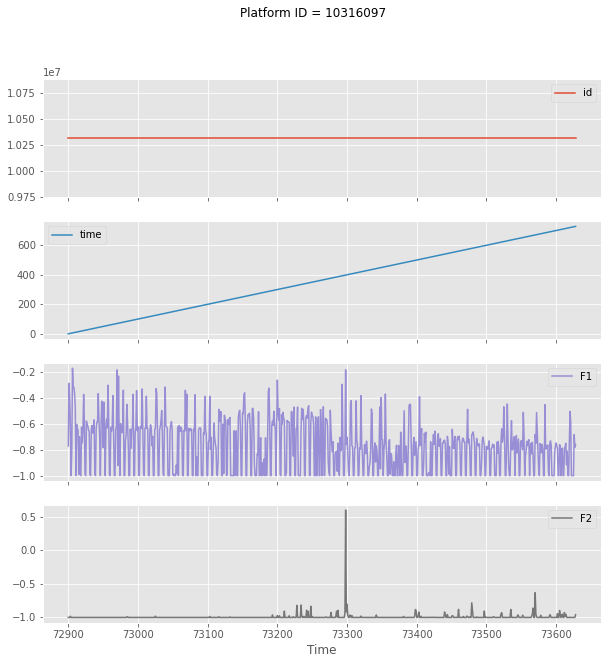

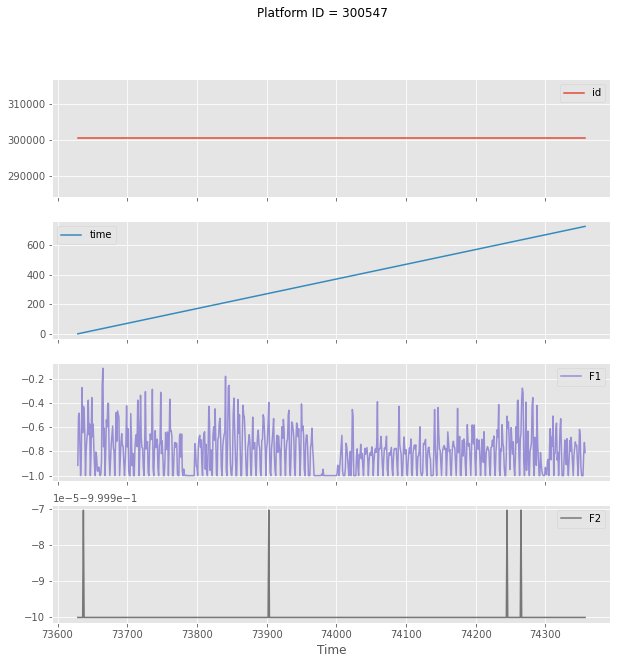

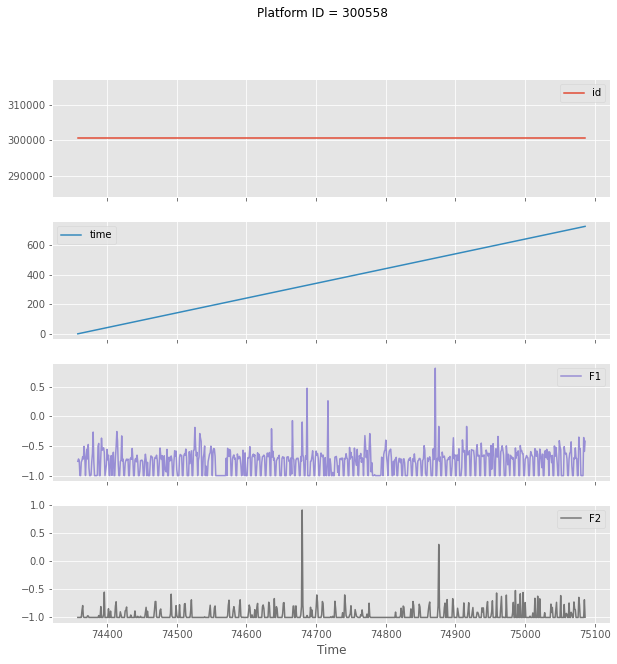

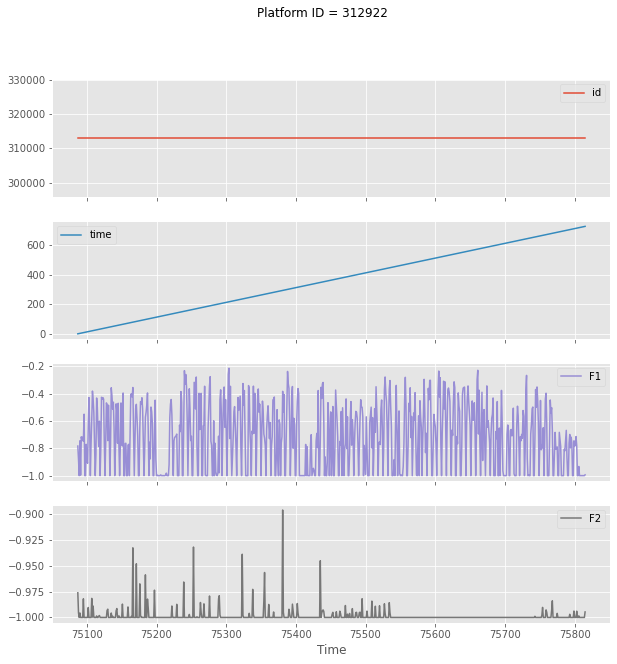

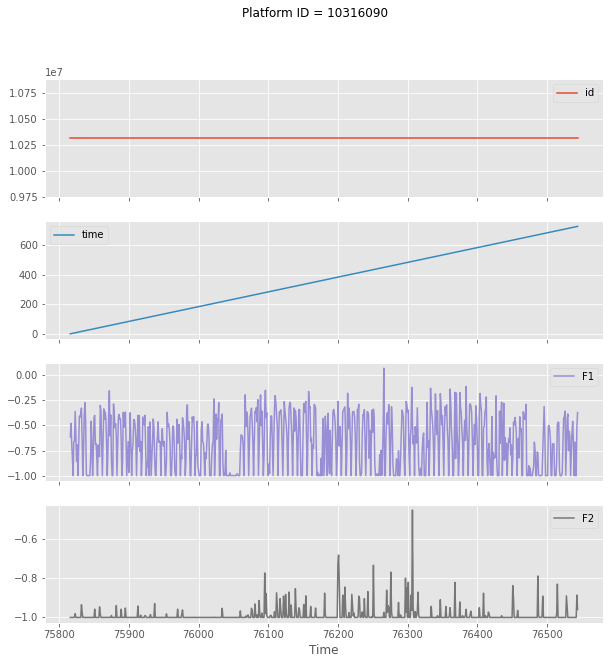

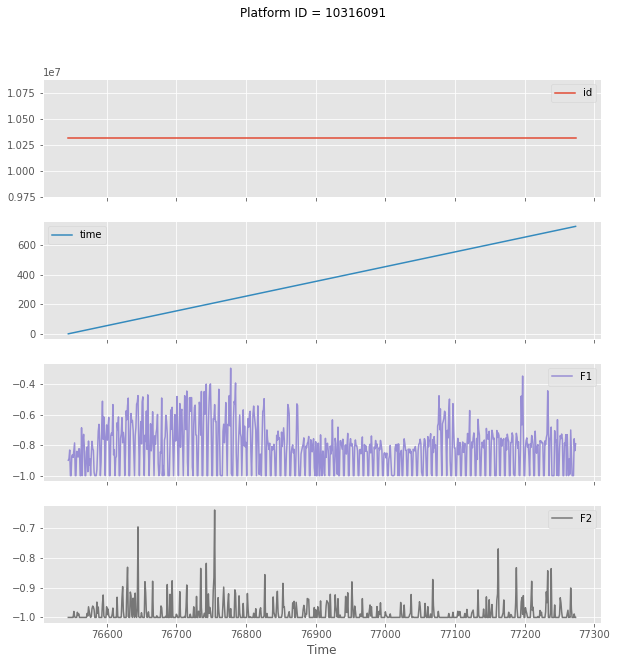

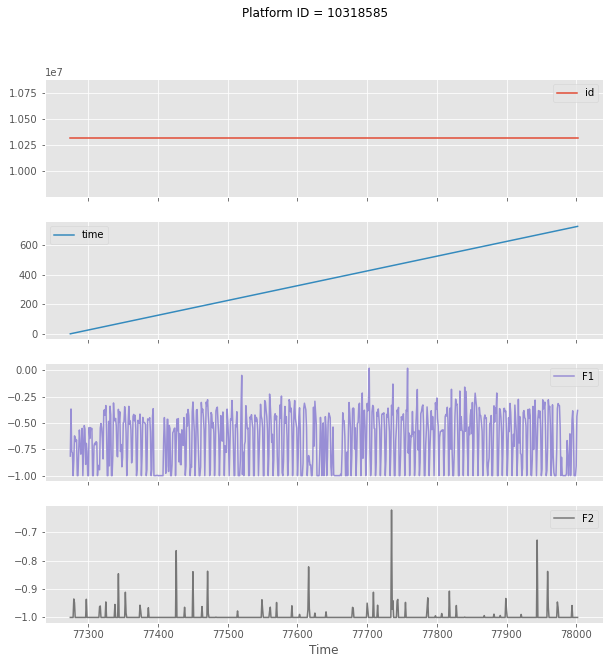

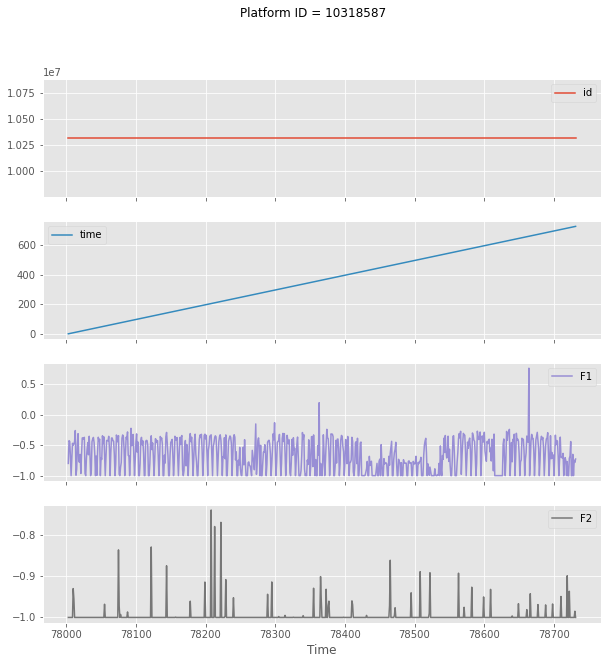

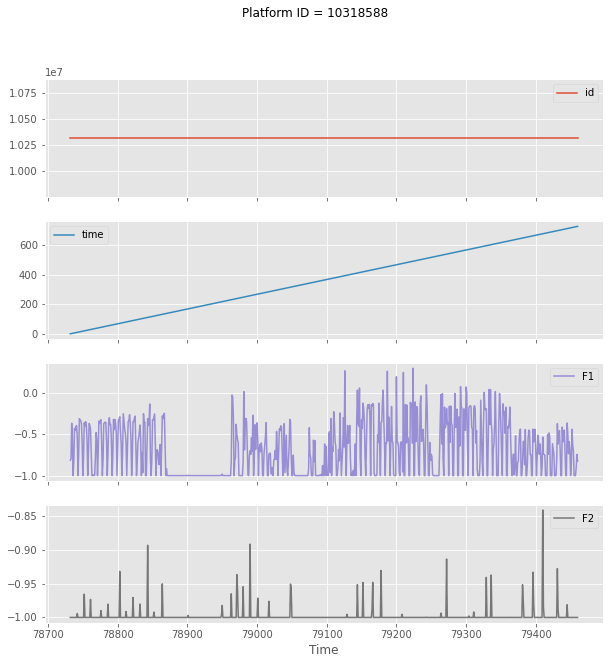

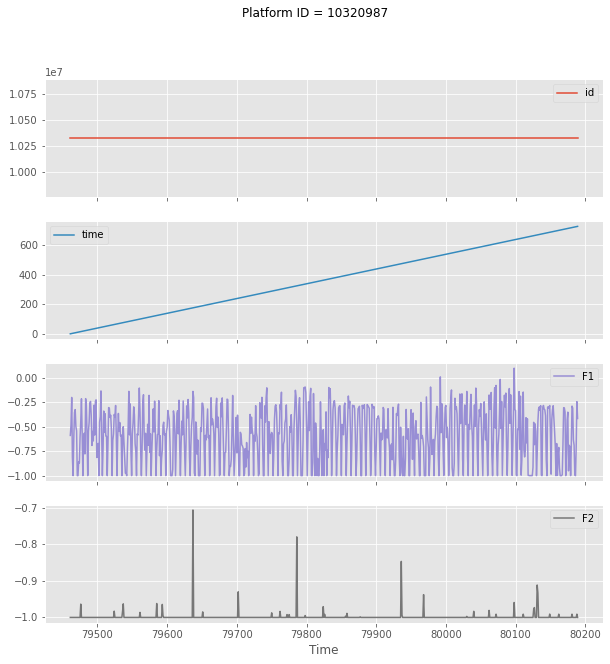

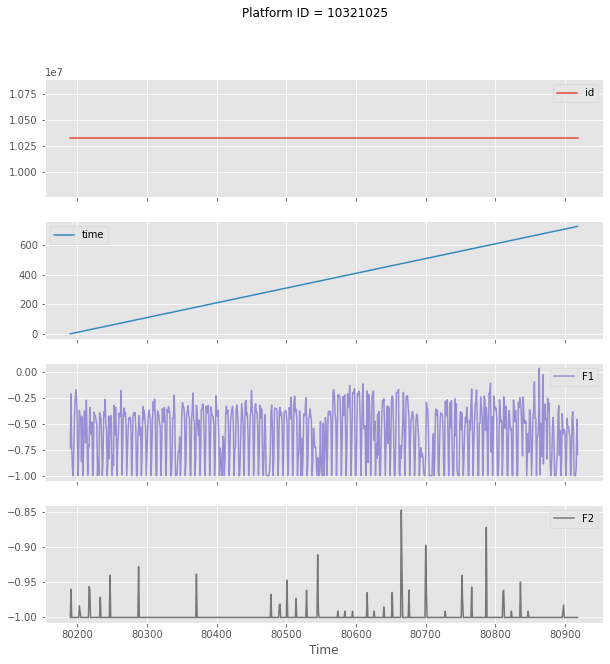

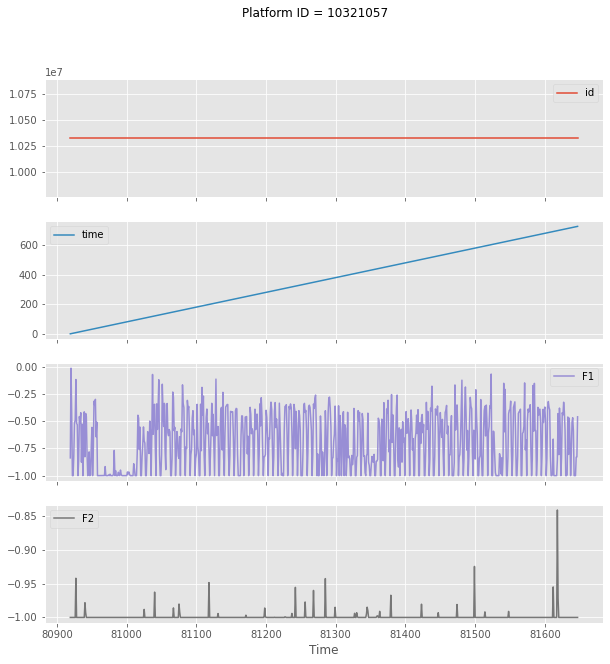

In [64]:
for i in X['id'].unique():
    X[X['id'] == i].plot(subplots=True, sharex=True, figsize=(10,10), title = f"Platform ID = {i}", xlabel = "Time")
    plt.show()

In [67]:
extracted_features=extract_features(X, column_id="id", column_sort="time")

Feature Extraction: 100%|██████████| 19/19 [00:23<00:00,  1.24s/it]


In [68]:
extracted_features

F1__variance_larger_than_standard_deviation  F1__has_duplicate_max  \
300498                                            0.0                    0.0   
300547                                            0.0                    0.0   
300558                                            0.0                    0.0   
300681                                            0.0                    0.0   
300771                                            0.0                    0.0   
...                                               ...                    ...   
10320957                                          0.0                    0.0   
10320987                                          0.0                    0.0   
10321025                                          0.0                    0.0   
10321057                                          0.0                    0.0   
10321243                                          0.0                    0.0   

          F1__has_duplicate_min  F1__has_duplicate  F1__sum_values  \
300498                      1.0                1.0     -590.129374   
300547                      1.0                1.0     -581.906120   
300558                      1.0                1.0     -559.412566   
300681                      1.0                1.0     -577.127776   
300771                      1.0                1.0     -599.346319   
...                         ...                ...             ...   
10320957                    1.0                1.0     -507.641287   
10320987                    1.0                1.0     -431.336774   
10321025                    1.0                1.0     -431.366732   
10321057                    1.0                1.0     -500.750968   
10321243                    1.0                1.0     -446.588325   

          F1__abs_energy  F1__mean_abs_change  F1__mean_change  \
300498        509.863855             0.165567         0.000099   
300547        487.099444             0.136449         0.000146   
300558        460.698411             0.160892         0.000466   
300681        483.495894             0.143405         0.000426   
300771        512.549375             0.133064         0.000133   
...                  ...                  ...              ...   
10320957      391.903794             0.180489         0.000115   
10320987      310.464989             0.247318         0.000238   
10321025      307.411919             0.225816        -0.000086   
10321057      392.133833             0.208104         0.000519   
10321243      322.691130             0.227641         0.000841   

          F1__mean_second_derivative_central  F1__median  ...  \
300498                             -0.000167   -0.842717  ...   
300547                             -0.000337   -0.800459  ...   
300558                              0.000091   -0.723706  ...   
300681                             -0.000072   -0.770826  ...   
300771                              0.000193   -0.805238  ...   
...                                      ...         ...  ...   
10320957                           -0.000290   -0.720480  ...   
10320987                           -0.000190   -0.574408  ...   
10321025                           -0.000591   -0.501764  ...   
10321057                           -0.000313   -0.684331  ...   
10321243                           -0.000217   -0.580133  ...   

          F2__permutation_entropy__dimension_5__tau_1  \
300498                                       0.041839   
300547                                       0.136580   
300558                                       2.535140   
300681                                       0.563502   
300771                                       2.488420   
...                                               ...   
10320957                                     1.480898   
10320987                                     0.853636   
10321025                                     0.855708   
10321057                                     0.900038   
1032124

In [69]:
extract_relevant_features = extract_relevant_features(X, y, column_id='id', column_sort='time')

Feature Extraction: 100%|██████████| 19/19 [00:23<00:00,  1.24s/it]


In [70]:
extract_relevant_features

Empty DataFrame
Columns: []
Index: [300498, 300547, 300558, 300681, 300771, 301117, 301475, 301585, 301589, 301841, 301972, 302019, 302054, 302230, 302332, 302548, 302576, 302641, 302642, 302651, 302653, 302655, 302662, 302668, 303094, 303104, 303148, 303576, 303757, 303909, 304104, 304333, 304355, 304885, 305391, 306479, 306527, 306571, 307241, 307422, 307602, 308049, 308052, 308292, 308374, 308766, 309011, 309094, 309164, 309265, 309405, 309450, 310175, 310201, 310231, 311109, 311663, 311976, 312545, 312738, 312753, 312831, 312834, 312889, 312890, 312892, 312897, 312903, 312905, 312909, 312922, 312958, 313154, 313183, 10312984, 10314364, 10314451, 10314820, 10315841, 10315859, 10315904, 10315950, 10315963, 10316053, 10316081, 10316084, 10316086, 10316088, 10316089, 10316090, 10316091, 10316097, 10317538, 10317557, 10318391, 10318423, 10318577, 10318578, 10318582, 10318584, ...]

[112 rows x 0 columns]

Look at these features with some EDA to convince myself why they might be good features for determining failure.

At that point you'll have a dataframe with just those features, then you're on the brink of being able to do the feature preparation for the autoencoder.

-> Keras - You take it from flat to a multidimensional tensor. It will produce 3D vector.



When you get the features out of TS Fresh, less is more! See what you can use it with a handful of the TS Fresh features and see what you do there. TS Fresh will rank it for you.